In [11]:
import numpy as np
import sklearn
import pickle
from sklearn.preprocessing import LabelEncoder
from sklearn import preprocessing
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


   # INFO DATABASE:


Citation Request:
  This dataset is public available for research. The details are described in [Moro et al., 2011]. 
  Please include this citation if you plan to use this database:

  [Moro et al., 2011] S. Moro, R. Laureano and P. Cortez. Using Data Mining for Bank Direct Marketing: An Application of the CRISP-DM Methodology. 
  In P. Novais et al. (Eds.), Proceedings of the European Simulation and Modelling Conference - ESM'2011, pp. 117-121, Guimarães, Portugal, October, 2011. EUROSIS.

  Available at: [pdf] http://hdl.handle.net/1822/14838
                [bib] http://www3.dsi.uminho.pt/pcortez/bib/2011-esm-1.txt

1. Title: Bank Marketing

2. Sources
   Created by: Paulo Cortez (Univ. Minho) and Sérgio Moro (ISCTE-IUL) @ 2012
   
3. Past Usage:

  The full dataset was described and analyzed in:

  S. Moro, R. Laureano and P. Cortez. Using Data Mining for Bank Direct Marketing: An Application of the CRISP-DM Methodology. 
  In P. Novais et al. (Eds.), Proceedings of the European Simulation and Modelling Conference - ESM'2011, pp. 117-121, Guimarães, 
  Portugal, October, 2011. EUROSIS.

4. Relevant Information:

   The data is related with direct marketing campaigns of a Portuguese banking institution. 
   The marketing campaigns were based on phone calls. Often, more than one contact to the same client was required, 
   in order to access if the product (bank term deposit) would be (or not) subscribed. 

   There are two datasets: 
      1) bank-full.csv with all examples, ordered by date (from May 2008 to November 2010).
      2) bank.csv with 10% of the examples (4521), randomly selected from bank-full.csv.
   The smallest dataset is provided to test more computationally demanding machine learning algorithms (e.g. SVM).

   The classification goal is to predict if the client will subscribe a term deposit (variable y).

5. Number of Instances: 45211 for bank-full.csv (4521 for bank.csv)

6. Number of Attributes: 16 + output attribute.

7. Attribute information:

   For more information, read [Moro et al., 2011].

   Input variables:
   
8. Missing Attribute Values: None   
   
   # bank client data:
   1 - age (numeric)
   
   2 - job : type of job (categorical: "admin.","unknown","unemployed","management","housemaid","entrepreneur","student","blue-collar","self-employed","retired","technician","services") 
   
   3 - marital : marital status (categorical: "married","divorced","single"; note: "divorced" means divorced or widowed)
  
   4 - education (categorical: "unknown","secondary","primary","tertiary")
   
   5 - default: has credit in default? (binary: "yes","no")
   
   6 - balance: average yearly balance, in euros (numeric) 
   
   7 - housing: has housing loan? (binary: "yes","no")
   
   8 - loan: has personal loan? (binary: "yes","no")
   # related with the last contact of the current campaign:
   9 - contact: contact communication type (categorical: "unknown","telephone","cellular") 
  
   10 - day: last contact day of the month (numeric)
  
   11 - month: last contact month of year (categorical: "jan", "feb", "mar", ..., "nov", "dec")
   
   12 - duration: last contact duration, in seconds (numeric)
   # other attributes:
   13 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
  
   14 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric, -1 means client was not previously contacted)
   
   15 - previous: number of contacts performed before this campaign and for this client (numeric)
   
   16 - poutcome: outcome of the previous marketing campaign (categorical: "unknown","other","failure","success")

  Output variable (desired target):
   
   17 - y - has the client subscribed a term deposit? (binary: "yes","no")


The aim of EUROSIS (The European Multidisciplinary Society for Modelling and Simulation Technology) is to be the primary mover and initiator for and of European simulation and modelling projects, which bridge the gap between academic and industry based simulation and modelling research in Europe. 

In [12]:
#Import the files
bank=pd.read_csv('bank.csv',sep=';')
bank_full=pd.read_csv('bank-full.csv',sep=';')#../bank/
data_add_full=pd.read_csv('bank-additional-full.csv',sep=';')
data_add=pd.read_csv('bank-additional.csv',sep=';')

# DATA EXPLORATION

In [13]:
bank.describe()

,age,balance,day,duration,campaign,pdays,previous
count,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000
mean,41.170095,1422.657819,15.915284,263.961292,2.793630,39.766645,0.542579
std,10.576211,3009.638142,8.247667,259.856633,3.109807,100.121124,1.693562
min,19.000000,-3313.000000,1.000000,4.000000,1.000000,-1.000000,0.000000
25%,33.000000,69.000000,9.000000,104.000000,1.000000,-1.000000,0.000000
50%,39.000000,444.000000,16.000000,185.000000,2.000000,-1.000000,0.000000
75%,49.000000,1480.000000,21.000000,329.000000,3.000000,-1.000000,0.000000
max,87.000000,71188.000000,31.000000,3025.000000,50.000000,871.000000,25.000000


##### I decide to use the both database, the first one have the balance and the  other euribor and other ecnomic features. 

In [14]:
#bank_full[:5]
#data_add_full[:5]
#data_add[:5]
#print(data_add_full.columns)
print(bank_full.columns)

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')


In [15]:
#bank.info()
#bank_full.info()
#data_add_full.info()
#data_add.info()
data=bank_full
print(bank_full.columns)

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')


In [16]:
def explore_data(df):
    # this function applies many exploratory techniques to a given a overview of the dataframe
    display("Head",
            df.head()
            .style
            .background_gradient(cmap='Blues')
           )
    display("Data Types",
            df.dtypes
            .to_frame()
           )
    display("Data Types Count",
            df.dtypes
            .to_frame()[0]
            .value_counts()
            .to_frame()
           )
    display("Nan Values per Column",
            df.isna()
            .sum()
            .to_frame()
            .sort_values(by=[0], ascending=False)
           )
    display("Descriptive Statistics",
            df.describe()
           )
    display("Correlation Matrix",
            df.corr()
            .style.background_gradient(cmap='coolwarm')
            .set_precision(2)
           )
    
#explore_data(data)

In [17]:
 def missing_values_table(df):
        # Total missing values
        mis_val = df.isnull().sum()
        
        # Percentage of missing values
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        
        # Make a table with the results
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        
        # Rename the columns
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        
        # Sort the table by percentage of missing descending
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        
        # Print some summary information
        print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"      
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")
        
        # Return the dataframe with missing information
        return mis_val_table_ren_columns

missing_values_table(data)

Your selected dataframe has 17 columns.
There are 0 columns that have missing values.


,Missing Values,% of Total Values


# Exploratory Analysis:

#### The data is clean, then let's visualize:


1. Balance

2. Age

3. Job VS Education

4. Marital

5. Default

6. Deposit (Y)

7. Loans (Personal loans and housing)

8. Correlation

9. Conclusions


### 1. Balance

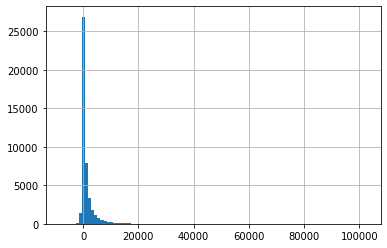

In [18]:
data["balance"].hist(bins=100)

In [19]:

round(data.pivot_table(columns='marital',aggfunc={'balance': np.mean}),0)#index='job', 
round(data.pivot_table(columns='education',aggfunc={'balance': np.mean}),0)
#round(data.pivot_table(columns='job',aggfunc={'balance': np.mean}),0)
#round(data.pivot_table(columns='loan',aggfunc={'balance': np.mean}),0)
#round(data.pivot_table(columns='housing',aggfunc={'balance': np.mean}),0)
#round(data.pivot_table(columns='default',aggfunc={'balance': np.mean}),0)

education,primary,secondary,tertiary,unknown
balance,1251.0,1155.0,1758.0,1527.0


In [20]:
data["balance"].quantile(0.80)

1859.0

In [21]:
data[(data.balance >= 1859)]["age"].median()

42.0

### 2. Age

In [22]:
len(data)

45211

In [23]:
print(len(data[data['age']<20])/len(data)*100)
(len(data[data['age']>60]))/len(data)*100

0.1039570016146513


2.6276791046426755

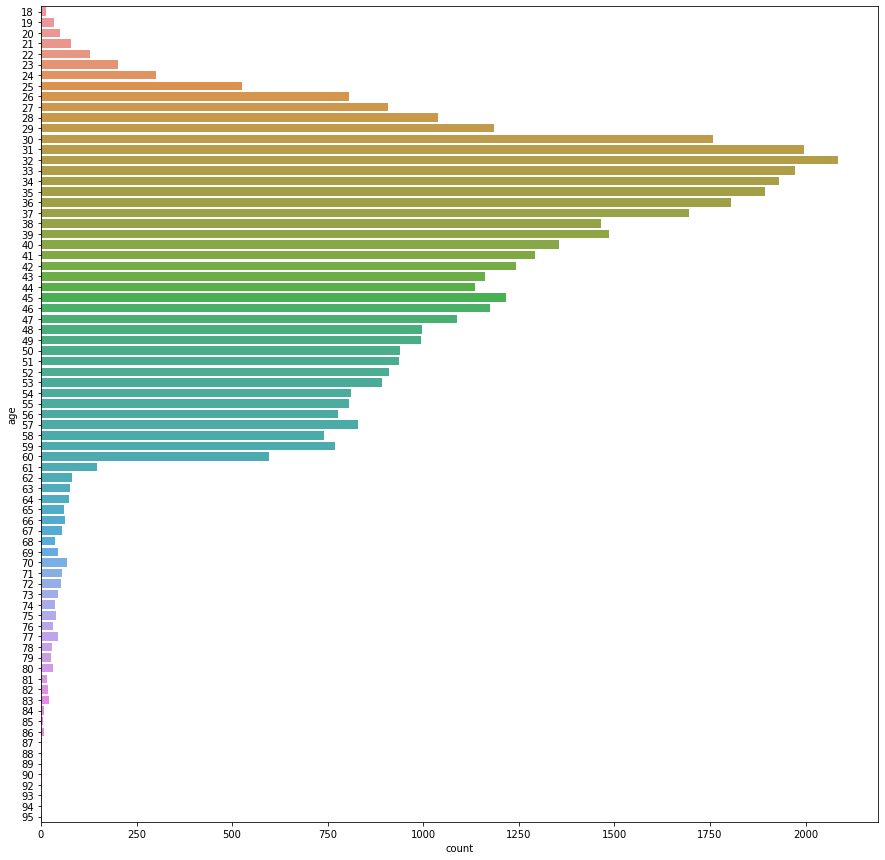

In [11]:
fig, ax = plt.subplots(figsize=(15,15))  
sns.countplot(y='age', data=data)

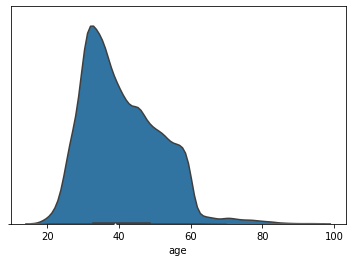

In [12]:
import seaborn as sns

sns.violinplot("age", data = data)
sns.distplot(data['age'])

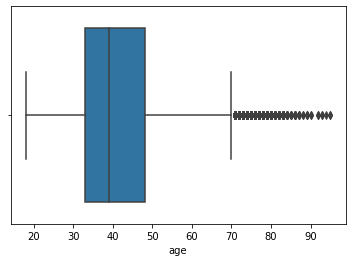

In [13]:
sns.boxplot(data["age"])

In [14]:
round(data.pivot_table( columns='age',aggfunc={'balance': np.mean}),0)#index='age',

age,18,19,20,21,22,23,24,25,26,27,...,85,86,87,88,89,90,92,93,94,95
balance,372.0,540.0,842.0,867.0,936.0,1040.0,915.0,871.0,1035.0,1084.0,...,4603.0,1315.0,2400.0,540.0,625.0,356.0,775.0,775.0,1234.0,1141.0


In [85]:
# cuanta gente hay entre 80 y 85 y 85 y 90??
#data[data.groupby(['balance'])['age']>85]
#data[(data.age >= 70) & (data.age <= 80)].count()  # count 455  /mean age  74.193407 / balance     2884.751648
#data[(data.age >= 80) & (data.age <= 85)].mean()# =====> count 103  / balance     3590.097087
data[(data.age <= 20)].mean()#===>  count 32/ balance     1710.50000

age          19.391753
balance     674.824742
day          14.288660
duration    199.659794
campaign      2.360825
pdays        46.134021
previous      0.824742
dtype: float64

Text(0, 0.5, 'BALANCE')

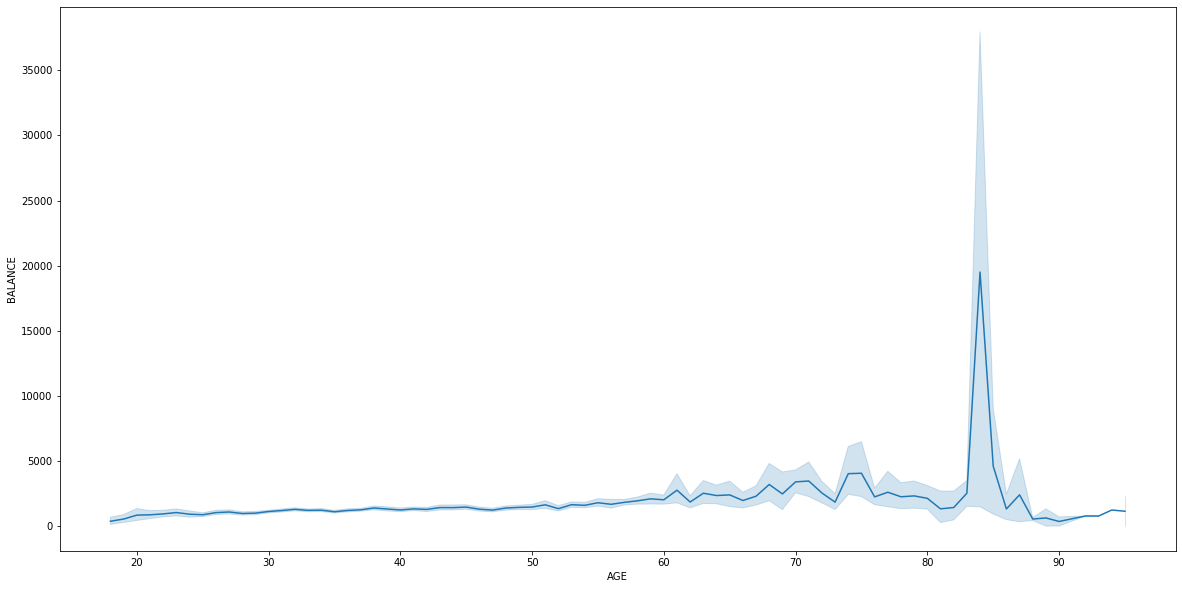

In [16]:
ig, axs = plt.subplots(nrows=1, ncols=1,figsize=(20, 10))
sns.lineplot(x="age", y="balance", data=data)
axs.set_xlabel('AGE')
axs.set_ylabel('BALANCE')


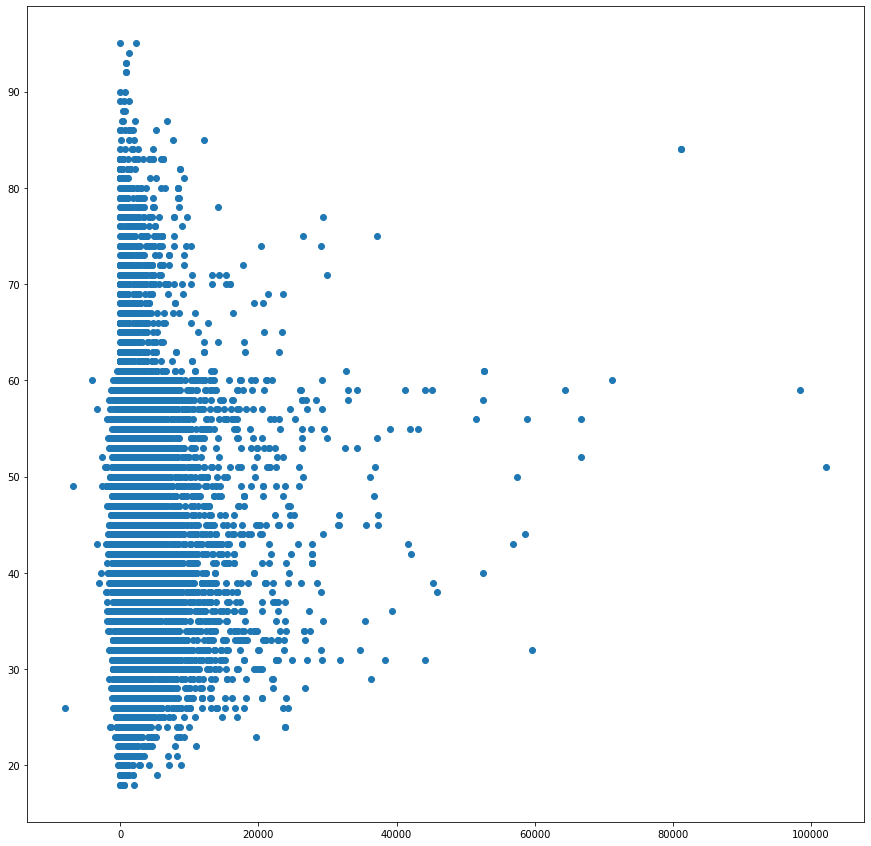

In [17]:
#neg from 25 to 60, that is when the people get retired
fig, ax = plt.subplots(figsize=(15,15))  
plt.scatter(data["balance"], data["age"], label="Year built")

In [18]:
data['job'][data['age']>60].value_counts()

retired          875
management       105
housemaid         56
technician        30
blue-collar       26
admin.            25
self-employed     24
unknown           22
entrepreneur      13
unemployed        10
services           2
Name: job, dtype: int64

In [19]:
data['job'][data['age']>60].value_counts().sum()/len(data)*100

2.6276791046426755

In [20]:
#top client
data.sort_values("balance", axis = 0, ascending = False).head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
39989,51,management,single,tertiary,no,102127,no,no,cellular,3,jun,90,1,-1,0,unknown,no
26227,59,management,married,tertiary,no,98417,no,no,telephone,20,nov,145,5,-1,0,unknown,no
43393,84,retired,married,secondary,no,81204,no,no,telephone,1,apr,390,1,94,3,success,yes
42558,84,retired,married,secondary,no,81204,no,no,telephone,28,dec,679,1,313,2,other,yes
41693,60,retired,married,primary,no,71188,no,no,cellular,6,oct,205,1,-1,0,unknown,no


In [21]:
#I will drop the 1% richer because outliers
data["balance"].quantile(0.95)

5768.0

In [22]:
clients95 = data[~(data['balance'] >= data["balance"].quantile(0.95))]  
clients98 = data[~(data['balance'] >= data["balance"].quantile(0.98))]  

Text(0, 0.5, 'BALANCE')

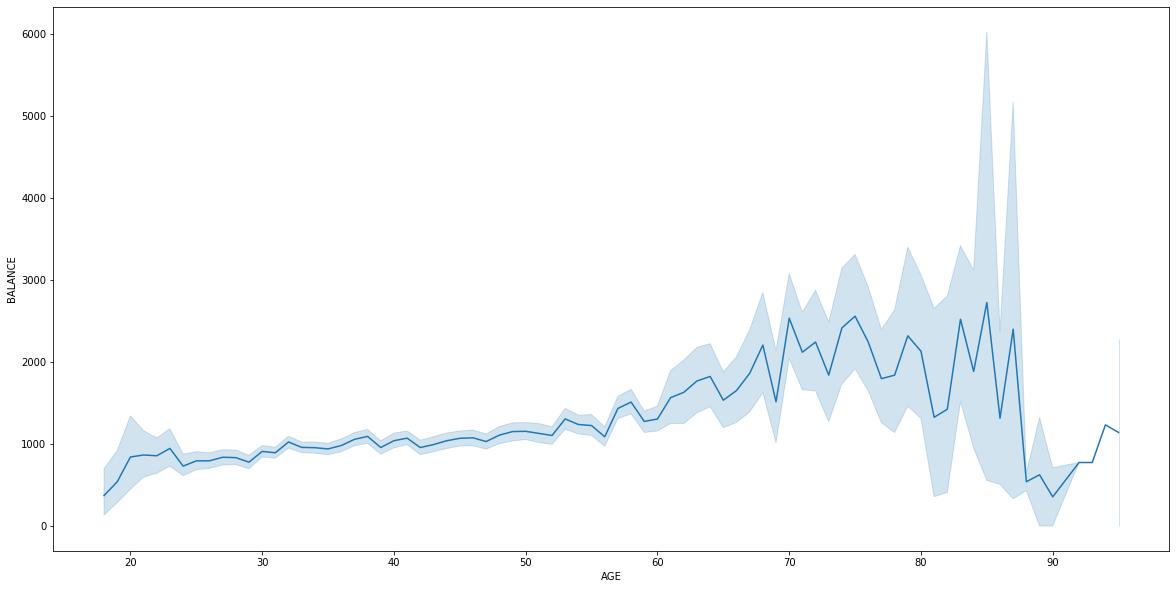

In [23]:
fig, axs = plt.subplots(nrows=1, ncols=1,figsize=(20, 10))
sns.lineplot(x="age", y="balance", data=clients98)
axs.set_xlabel('AGE')
axs.set_ylabel('BALANCE')

Text(0, 0.5, 'BALANCE')

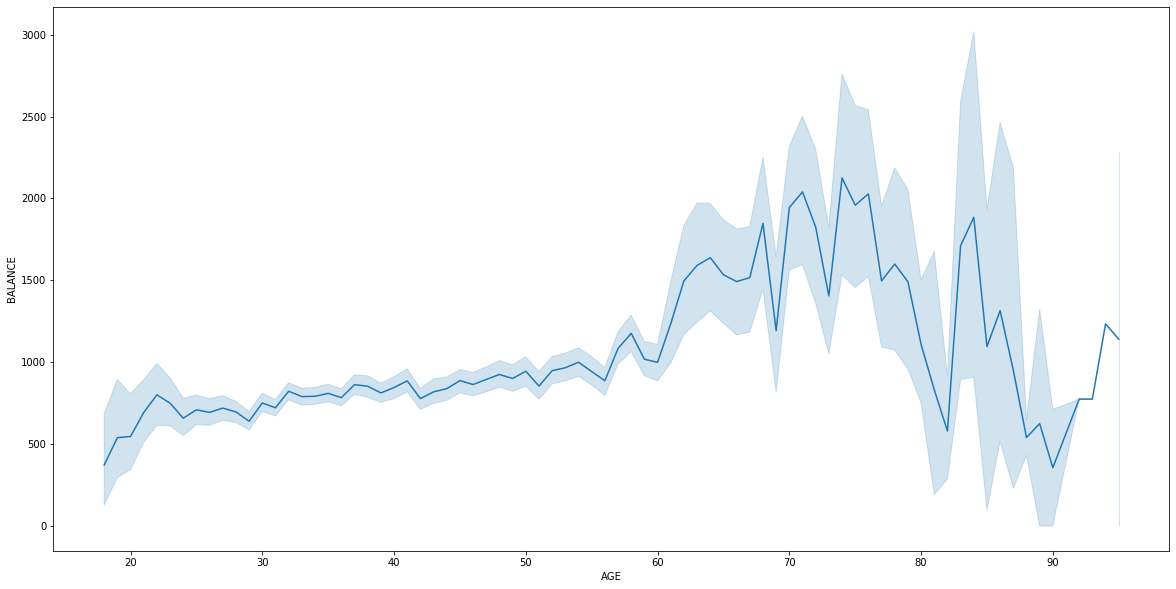

In [24]:
fig, axs = plt.subplots(nrows=1, ncols=1,figsize=(20, 10))
sns.lineplot(x="age", y="balance", data=clients95)
axs.set_xlabel('AGE')
axs.set_ylabel('BALANCE')

## 3. Job VS Education

In [15]:
x=round(data.pivot_table( columns='job',aggfunc={'balance': np.mean}),0).T
x.sort_values("balance", axis = 0)



,balance
job,
services,997.0
blue-collar,1079.0
admin.,1136.0
technician,1253.0
student,1388.0
housemaid,1392.0
entrepreneur,1521.0
unemployed,1522.0
self-employed,1648.0


<BarContainer object of 45211 artists>

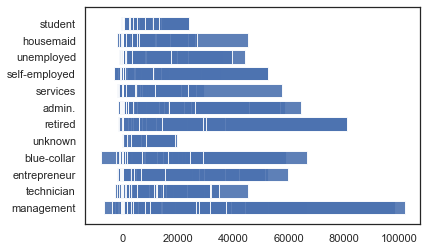

In [242]:
plt.barh(data.job, data.balance, align='center', alpha=0.9)

<BarContainer object of 45211 artists>

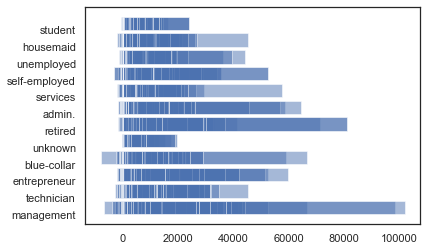

In [243]:
plt.barh(data.job, data.balance, align='edge', alpha=0.5)

In [17]:
#Can be related with the age???

x=round(data.pivot_table( columns='education',aggfunc={'balance': np.mean}),0).T
x.sort_values("balance", axis = 0)

,balance
education,
secondary,1155.0
primary,1251.0
unknown,1527.0
tertiary,1758.0


In [18]:
job_edu=round(data.pivot_table(index='education', columns='job',aggfunc={'balance': np.mean}),0)
job_edu

balance                                                        \
job        admin. blue-collar entrepreneur housemaid management retired   
education                                                                 
primary     930.0      1086.0       1679.0    1128.0     1672.0  1880.0   
secondary  1116.0      1064.0       1071.0    1444.0     1327.0  2061.0   
tertiary   1218.0      1549.0       1832.0    1830.0     1834.0  2161.0   
unknown    1601.0      1041.0       1554.0    2939.0     1635.0  1503.0   

                                                                        
job       self-employed services student technician unemployed unknown  
education                                                               
primary          1331.0    967.0  1244.0     1487.0     1588.0  1750.0  
secondary        1287.0    958.0  1260.0     1125.0     1433.0  1250.0  
tertiary         1951.0   1211.0  1645.0     1511.0     1687.0  2359.0  
unknown          1569.0   1683.0  1475.0     1758.0     1522.0  1893.0

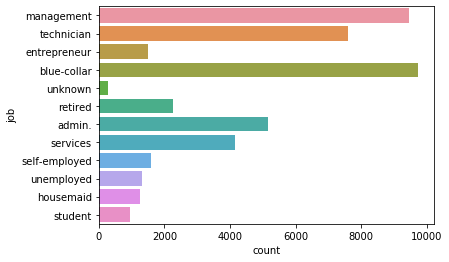

In [19]:
sns.countplot(y='job', data=data)

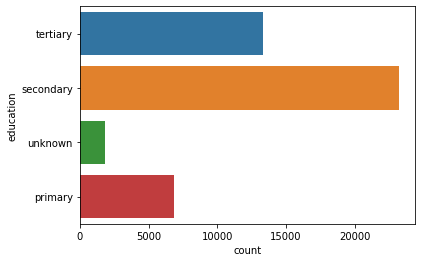

In [20]:
sns.countplot(y='education', data=data)

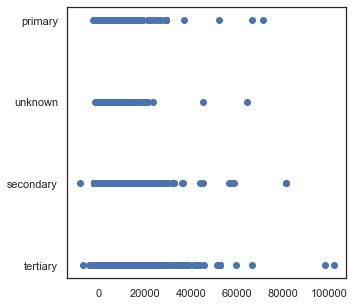

In [237]:
fig, ax = plt.subplots(figsize=(5,5))  
plt.scatter(data["balance"], data["education"], label="Education")

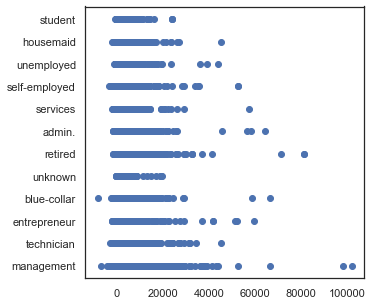

In [238]:
fig, ax = plt.subplots(figsize=(5,5))  
plt.scatter(data["balance"], data["job"], label="Job")

## 4. Married VS Single

Text(0, 0.5, 'balance')

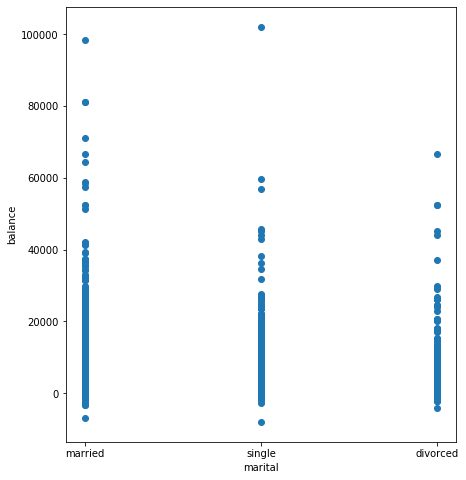

In [22]:
fig, axs = plt.subplots(nrows=1, ncols=1,figsize=(7, 8))
plt.scatter(data['marital'],data['balance'])
axs.set_xlabel('marital')
axs.set_ylabel('balance')

Text(0, 0.5, 'BALANCE')

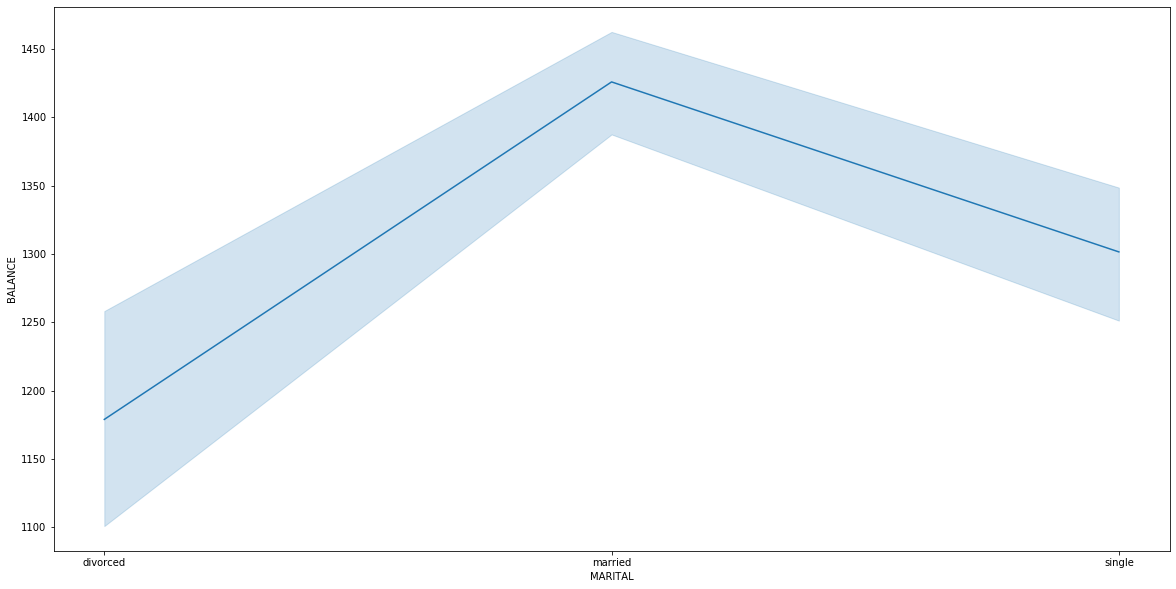

In [23]:
fig, axs = plt.subplots(nrows=1, ncols=1,figsize=(20, 10))
sns.lineplot(x="marital", y="balance", data=data)
axs.set_xlabel('MARITAL')
axs.set_ylabel('BALANCE')

<BarContainer object of 45211 artists>

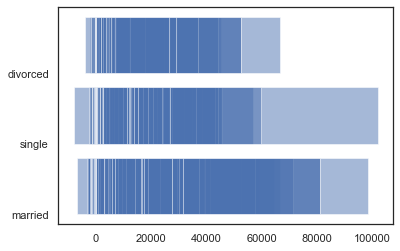

In [244]:
plt.barh(data.marital, data.balance, align='edge', alpha=0.5)

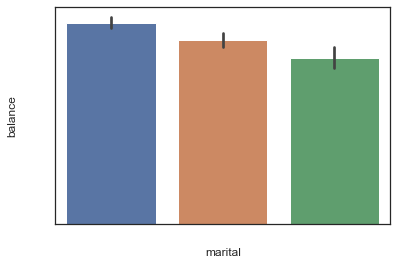

In [246]:
ax = sns.barplot(data.marital, data.balance)
ax.tick_params(colors='white')
plt.savefig('EU internet use male_white_text.png', bbox_inches = 'tight', transparent = True)

In [24]:
count = data.groupby('marital').size()
percent = count/len(data)*100
print(percent)

marital
divorced    11.517109
married     60.193316
single      28.289576
dtype: float64


In [25]:
round(data.pivot_table( columns='marital',aggfunc={'balance': np.mean}),0)#index='education',

marital,divorced,married,single
balance,1179.0,1426.0,1301.0


In [26]:
data.groupby('marital')['age'].median()

marital
divorced    45
married     42
single      32
Name: age, dtype: int64

In [27]:
pd.crosstab(data["marital"], columns=0)

col_0,0
marital,
divorced,5207
married,27214
single,12790


## 5. Default 

When the client pay or not them loans:

In [28]:
data.groupby(['default']).mean()

,age,balance,day,duration,campaign,pdays,previous
default,,,,,,,
no,40.961934,1389.806424,15.795792,258.512749,2.756780,40.604536,0.586044
yes,39.534969,-137.624540,16.385276,239.115337,3.148466,18.042945,0.268712


In [11]:
len(data['balance'][data['default']=='yes'])#.value_counts().sum()/len(data)*100

815

In [12]:
yes=data[data['default']=='yes']

len(yes[yes['balance']<0])

440

In [31]:
len(yes[yes['balance']<0])/len(data['balance'][data['default']=='yes'])*100

53.987730061349694

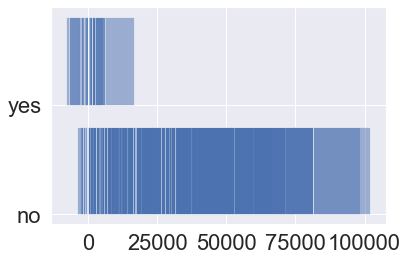

In [251]:
plt.barh(data.default, data.balance, align='edge', alpha=0.5)
ax.tick_params(colors='white')
axs.tick_params(colors='white')
axs.xaxis.label.set_color('white')
axs.yaxis.label.set_color('white')
plt.savefig('EU internet use male_white_text.png', bbox_inches = 'tight', transparent = True)

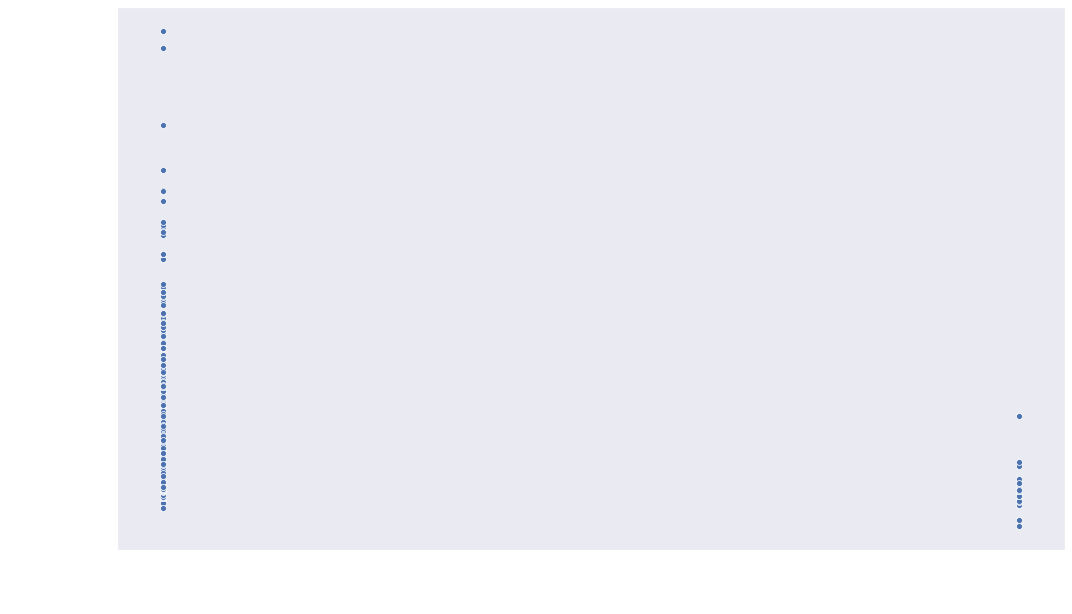

In [250]:
#Eveline para poner las letras en blanco desde el transparente

sns.set(font_scale = 2)
#plt.style.use('dark_background')
fig, axs = plt.subplots(1,1, figsize = (17,10))
sns.scatterplot(x = 'default', y = 'balance', data = data)#, hue = 'Severity')#, ax = axs[0,0])
axs.tick_params(colors='white')
axs.set(xlabel='Longitude', ylabel='Latitude')
axs.xaxis.label.set_color('white')
axs.yaxis.label.set_color('white')
#axs.legend.label.set_color('white')
axs.grid(False)
plt.savefig('us-accidents-map.png', bbox_inches = 'tight', transparent = True)

default
no     98.197341
yes     1.802659
dtype: float64


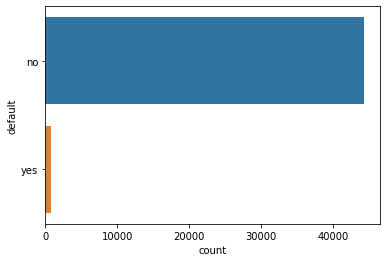

In [32]:
sns.countplot(y='default', data=data)

count = data.groupby('default').size()
percent = count/len(data)*100
print(percent)


## 6. Deposit (y)

If the client subscribed a term deposit

,age,balance,day,duration,campaign,pdays,previous
y,,,,,,,
no,40.838986,1303.714969,15.892290,221.182806,2.846350,36.421372,0.502154
yes,41.670070,1804.267915,15.158253,537.294574,2.141047,68.702968,1.170354


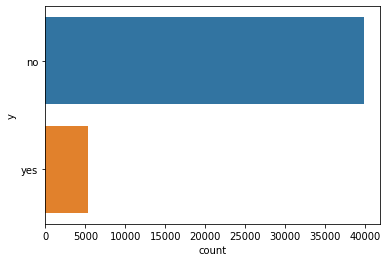

In [33]:
sns.countplot(y='y', data=data)#deposit
data.groupby(['y']).mean()
#round(data.pivot_table( columns='y',aggfunc={'balance': np.mean}),0)

Text(0, 0.5, 'Deposit')

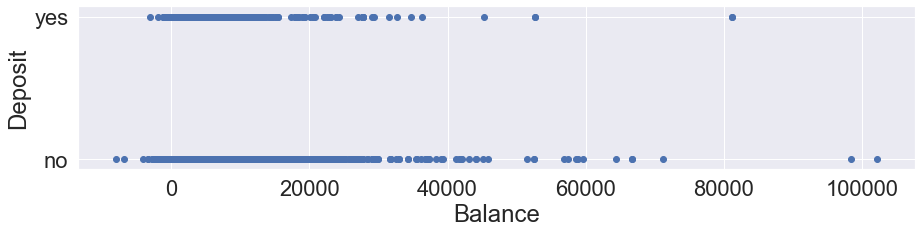

In [260]:
fig, axs = plt.subplots(nrows=1, ncols=1,figsize=(15, 3))
plt.scatter(data['balance'],data['y'])
axs.set_xlabel('Balance')
axs.set_ylabel('Deposit')

## 7. Loan

How there is personal loans and house loan, I will put the both in one column.  0 -> None,   1 -> one Loan,     2 -> the both loans

In [26]:
datas=pd.get_dummies(data,columns=['default','y','loan','housing'],drop_first=True)
datas['loan'] =datas['loan_yes']+datas['housing_yes']
datas=datas.drop(['housing_yes','loan_yes','contact','day','month','duration','campaign','pdays','previous','poutcome'], axis=1)

In [27]:
#how have loan have less money
balance_loan=round(datas.pivot_table(index='loan', columns='job',aggfunc={'balance': np.mean}),0)
balance_loan

balance                                                        \
job   admin. blue-collar entrepreneur housemaid management retired   
loan                                                                 
0     1549.0      1531.0       2051.0    1592.0     2046.0  2357.0   
1     1000.0       990.0       1313.0    1100.0     1614.0  1158.0   
2      707.0       733.0       1133.0     989.0     1027.0  1094.0   

                                                                   
job  self-employed services student technician unemployed unknown  
loan                                                               
0           2112.0   1128.0  1462.0     1384.0     1812.0  1795.0  
1           1333.0   1020.0  1166.0     1272.0     1243.0  1653.0  
2            875.0    625.0  2865.0      682.0      563.0   341.0

In [28]:
datas.pivot_table(index='age', columns=['loan'],aggfunc={'balance': np.mean}).corr()

balance                    
loan                 0         1         2
        loan                              
balance 0     1.000000  0.361514  0.386384
        1     0.361514  1.000000  0.606752
        2     0.386384  0.606752  1.000000

,age,balance,default_yes,y_yes
loan,,,,
0,43.260695,1737.606719,0.012323,0.182225
1,39.541455,1195.107910,0.019882,0.079907
2,39.329059,788.537898,0.030456,0.060682


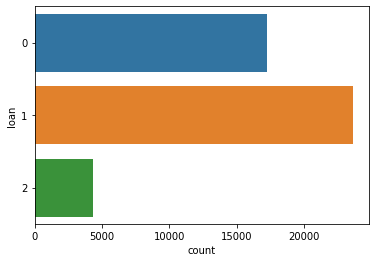

In [29]:
sns.countplot(y='loan', data=datas)
datas.groupby(['loan']).mean()


Text(0, 0.5, 'Loan')

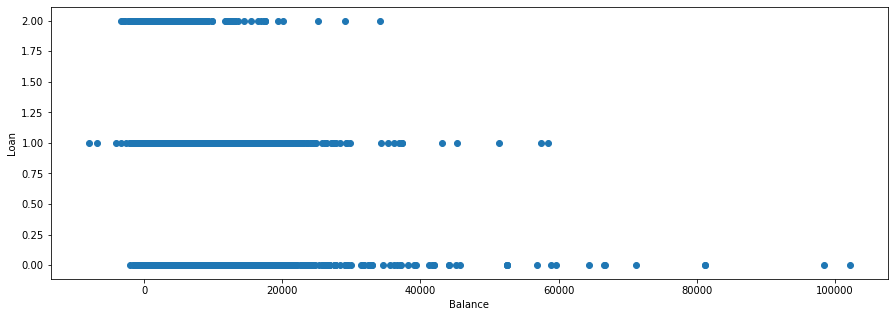

In [30]:
fig, axs = plt.subplots(nrows=1, ncols=1,figsize=(15, 5))
plt.scatter(datas['balance'],datas['loan'])
axs.set_xlabel('Balance')
axs.set_ylabel('Loan')

### 8. CORRELATION

For can see all the varables, we will have to put in numbers:

In [31]:
datascorr=pd.get_dummies(datas,columns=['education','job','marital'],drop_first=True)

In [32]:

datascorr.corr().style.background_gradient(cmap='coolwarm').set_precision(2)

,age,balance,default_yes,y_yes,loan,education_secondary,education_tertiary,education_unknown,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_married,marital_single
age,1,0.098,-0.018,0.025,-0.16,-0.094,-0.082,0.07,-0.044,0.022,0.087,-0.024,0.45,-0.0081,-0.066,-0.2,-0.069,0.00041,0.05,0.29,-0.43
balance,0.098,1,-0.067,0.053,-0.1,-0.07,0.084,0.011,-0.049,0.0096,0.0017,0.068,0.047,0.018,-0.038,0.0012,-0.016,0.009,0.011,0.026,-0.013
default_yes,-0.018,-0.067,1,-0.022,0.04,0.013,-0.015,-0.0012,0.01,0.026,-0.00036,-0.0027,-0.011,0.0041,6.8e-05,-0.016,-0.0031,0.0065,-0.0067,-0.014,0.0031
y_yes,0.025,0.053,-0.022,1,-0.15,-0.036,0.066,0.012,-0.072,-0.02,-0.015,0.033,0.079,0.00086,-0.028,0.077,-0.009,0.02,0.00027,-0.06,0.064
loan,-0.16,-0.1,0.04,-0.15,1,0.12,-0.11,-0.067,0.15,0.032,-0.073,-0.073,-0.13,-0.026,0.076,-0.1,-0.0015,-0.059,-0.078,0.035,-0.046
education_secondary,-0.094,-0.07,0.013,-0.036,0.12,1,-0.66,-0.21,0.041,-0.055,-0.065,-0.41,-0.036,-0.056,0.2,0.0083,0.16,0.016,-0.043,-0.018,0.0052
education_tertiary,-0.082,0.084,-0.015,0.066,-0.11,-0.66,1,-0.13,-0.32,0.068,-0.057,0.6,-0.067,0.097,-0.17,-0.018,-0.035,-0.027,-0.028,-0.096,0.11
education_unknown,0.07,0.011,-0.0012,0.012,-0.067,-0.21,-0.13,1,0.015,0.0093,-0.004,-0.04,0.013,-0.016,-0.008,0.097,-0.021,-0.016,0.16,0.0096,0.00066
job_blue-collar,-0.044,-0.049,0.01,-0.072,0.15,0.041,-0.32,0.015,1,-0.097,-0.088,-0.27,-0.12,-0.1,-0.17,-0.076,-0.24,-0.09,-0.042,0.12,-0.088
job_entrepreneur,0.022,0.0096,0.026,-0.02,0.032,-0.055,0.068,0.0093,-0.097,1,-0.031,-0.095,-0.042,-0.035,-0.059,-0.027,-0.083,-0.032,-0.015,0.044,-0.05


In [33]:
datas['jobs'] = datas['job'].map({'services': 0, 'blue-collar': 1,'admin.': 2, 'technician': 3,'student': 4,'housemaid': 5, 'entrepreneur': 6,'unemployed': 7, 'self-employed': 8,'management':9,'unknown': 10, 'retired': 11})

In [34]:
from sklearn.preprocessing import LabelEncoder

lb_make = LabelEncoder()
datas["prueba"] = lb_make.fit_transform(datas["job"])
datas[['prueba','jobs']].head()

,prueba,jobs
0,4,9
1,9,3
2,2,6
3,1,1
4,11,10


In [35]:
y=round(datas.pivot_table( columns='education',aggfunc={'balance': np.mean}),0).T
y.sort_values("balance", axis = 0)

,balance
education,
secondary,1155.0
primary,1251.0
unknown,1527.0
tertiary,1758.0


In [36]:
datas['educations'] = datas['education'].map({'secondary': 0, 'primary': 1,'unknown': 2, 'tertiary': 3})

In [37]:
dataa=datas.drop(['job','education'], axis=1)

In [38]:
data_numbers=pd.get_dummies(dataa,columns=['marital'],drop_first=True)
data_numbers.corr().style.background_gradient(cmap='coolwarm').set_precision(2)

,age,balance,default_yes,y_yes,loan,jobs,prueba,educations,marital_married,marital_single
age,1,0.098,-0.018,0.025,-0.16,0.24,-0.022,-0.01,0.29,-0.43
balance,0.098,1,-0.067,0.053,-0.1,0.1,0.018,0.087,0.026,-0.013
default_yes,-0.018,-0.067,1,-0.022,0.04,-0.0043,-0.0069,-0.016,-0.014,0.0031
y_yes,0.025,0.053,-0.022,1,-0.15,0.087,0.04,0.062,-0.06,0.064
loan,-0.16,-0.1,0.04,-0.15,1,-0.21,-0.12,-0.13,0.035,-0.046
jobs,0.24,0.1,-0.0043,0.087,-0.21,1,0.18,0.52,0.0028,-0.025
prueba,-0.022,0.018,-0.0069,0.04,-0.12,0.18,1,0.055,-0.093,0.093
educations,-0.01,0.087,-0.016,0.062,-0.13,0.52,0.055,1,-0.059,0.075
marital_married,0.29,0.026,-0.014,-0.06,0.035,0.0028,-0.093,-0.059,1,-0.77
marital_single,-0.43,-0.013,0.0031,0.064,-0.046,-0.025,0.093,0.075,-0.77,1


In [39]:
data_numbers.corr().style.background_gradient(cmap='Greys').set_precision(5)

,age,balance,default_yes,y_yes,loan,jobs,prueba,educations,marital_married,marital_single
age,1,0.097783,-0.017879,0.025155,-0.15551,0.24218,-0.021868,-0.010373,0.28626,-0.42782
balance,0.097783,1,-0.066745,0.052838,-0.1034,0.10151,0.018232,0.08678,0.025708,-0.012537
default_yes,-0.017879,-0.066745,1,-0.022419,0.040238,-0.0043385,-0.0068531,-0.015827,-0.01446,0.0031152
y_yes,0.025155,0.052838,-0.022419,1,-0.14954,0.086705,0.040438,0.061912,-0.06026,0.063526
loan,-0.15551,-0.1034,0.040238,-0.14954,1,-0.20756,-0.11815,-0.12941,0.035451,-0.046284
jobs,0.24218,0.10151,-0.0043385,0.086705,-0.20756,1,0.17505,0.51864,0.0027721,-0.024759
prueba,-0.021868,0.018232,-0.0068531,0.040438,-0.11815,0.17505,1,0.054943,-0.093245,0.092562
educations,-0.010373,0.08678,-0.015827,0.061912,-0.12941,0.51864,0.054943,1,-0.058557,0.075235
marital_married,0.28626,0.025708,-0.01446,-0.06026,0.035451,0.0027721,-0.093245,-0.058557,1,-0.77236
marital_single,-0.42782,-0.012537,0.0031152,0.063526,-0.046284,-0.024759,0.092562,0.075235,-0.77236,1


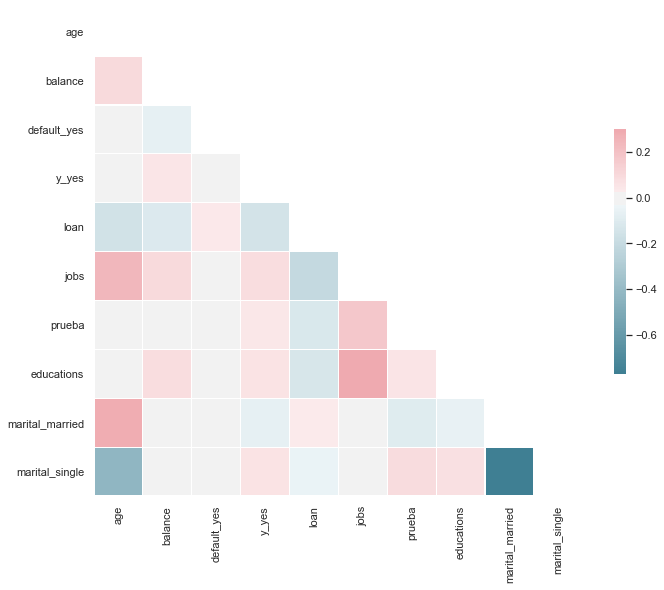

In [40]:
from string import ascii_letters
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.style as style

sns.set(style="white")
corr = data_numbers.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

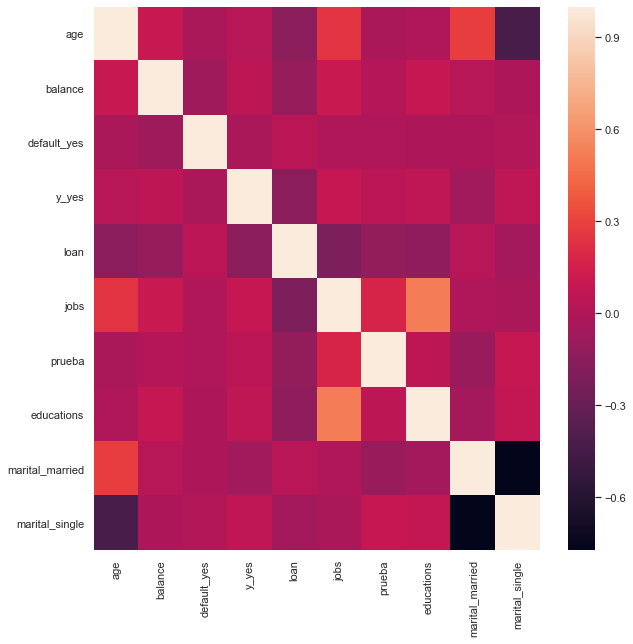

In [41]:
fig, ax = plt.subplots(figsize=(10,10))   
sns.heatmap(data_numbers.corr())

### 9. Conclusions: 


- The balance
The pareto theory, 20% richer is when have more 1859 eurosin the account, the people usually invest/spend the money in spite of keep it in the account, the median of have more than 1859 is 42.
- Age 
20-60 years, more only 
- Education 
If you want to have money in your account, better have studies.
- Age
The big part of the clients are between 20 and 60 years, more than 60 is only the 2.6%.
- Jobs
Best are retired, manager, sel-employ and unemployed
- Maritat
Married>single>divorced 60% Married and 10% divorced
- Loans 
richer and older dont have loans
53 of people with loans is in red numers


# MACHINE LEARNING

Although the exact implementation details can vary, the general structure of a machine learning project stays relatively constant:

- Data cleaning and formatting

- Exploratory data analysis

- Feature engineering and selection

- Establish a baseline and compare several machine learning models on a performance metric

- Perform hyperparameter tuning on the best model to optimize it for the problem

- Evaluate the best model on the testing set

- Interpret the model results to the extent possible

- Draw conclusions and write a well-documented report

In [205]:
count = ddata.groupby('default_yes').size()
percent = count/len(ddata)*100
print(percent)



default_yes
0    91.85
1     8.15
dtype: float64


#### Here I balance the data 

In [204]:
# perform upsampling to address sample imbalance
from sklearn.utils import resample
# Separate majority and minority classes
#resampled_data = data_numbers.resample('default_yes').mean()

ddata=data_numbers.sort_values(by=['default_yes'], ascending=False).head(10000)


### Train and Test split


Split Into Training and Testing Sets
In machine learning, we always need to separate our features into two sets:

1. Training set which we provide to our model during training along with the answers so it can learn a mapping between the features and the target.


2. Testing set which we use to evaluate the mapping learned by the model. The model has never seen the answers on the testing set, but instead, must make predictions using only the features. As we know the true answers for the test set, we can then compare the test predictions to the true test targets to ghet an estimate of how well our model will perform when deployed in the real world.

In [55]:
#y=ddata.default_yes####Balance

y=data_numbers.default_yes

#X=ddata.drop(['default_yes'],axis=1)##balance

X=data_numbers.drop(['default_yes'],axis=1)

x_train, x_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.2, random_state=0) #80/20 split

x_train.shape, y_train.shape

((36168, 9), (36168,))

### Training the model

#### Logistic Regression

In [57]:
model=LogisticRegression(penalty='l2', max_iter=1000)
model.fit(x_train, y_train)
pred=model.predict(x_test)
from sklearn.metrics import accuracy_score
accuracy_score(y_test, pred)

/Users/Estelle/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.9824173393785248

In [49]:
#plotting ROC curve and getting AUC value
metrics.roc_auc_score(y_test, pred)

0.5123768547473697

In [234]:
# Getting classification report
print(metrics.classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99      8885
           1       0.44      0.03      0.05       158

    accuracy                           0.98      9043
   macro avg       0.71      0.51      0.52      9043
weighted avg       0.97      0.98      0.97      9043



#### Support Vector Machine (SVM)

In [151]:
from sklearn.svm import SVC
clf = SVC()

In [152]:
clf.fit(x_train, y_train)

/Users/Estelle/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [153]:
pred = clf.predict(x_test)

In [154]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, pred)

0.9825279221497291

In [155]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, pred)
print(confusion_matrix)

[[8883    2]
 [ 156    2]]


In [ ]:
print(classification_report(y_test,y_pred))

#### Random Forest Classifier

In [74]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()

In [75]:
rfc.fit(x_train, y_train)

/Users/Estelle/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [76]:
predict = rfc.predict(x_test)

In [77]:
accuracy_score(y_test, predict)

0.9810903461240739

In [78]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, predict)
print(confusion_matrix)

[[8864   21]
 [ 150    8]]


#### Neural Network

In [79]:
from keras.models import Sequential
from keras.layers import Dense

Using TensorFlow backend.


In [80]:
model = Sequential()
model.add(Dense(10, input_dim=14, activation='tanh'))

model.add(Dense(1, activation='sigmoid'))

Instructions for updating:
Colocations handled automatically by placer.


In [81]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [82]:
x_train_keras = np.array(x_train)
y_train_keras = np.array(y_train)
#print(x_train_keras.shape)
y_train_keras = y_train_keras.reshape(y_train_keras.shape[0], 1)

In [84]:
#model.fit(np.array(x_train_keras), np,.array(y_train_keras), epochs=10, batch_size=128, shuffle=True

In [ ]:
scores = model.evaluate(np.array(x_test), np.array(y_test))

In [ ]:
print("\n%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

In [577]:
data_numbers.head()

,age,balance,default_yes,y_yes,loan,jobs,prueba,educations,marital_married,marital_single
0,58,2143,0,0,1,9,4,3,1,0
1,44,29,0,0,1,3,9,0,0,1
2,33,2,0,0,2,6,2,0,1,0
3,47,1506,0,0,1,1,1,2,1,0
4,33,1,0,0,0,10,11,2,0,1


In [ ]:
##R2, mre,MAe FIRST

# Regresion


#### Function to calculate mean absolute error

In [53]:

def mae(y_true, y_pred):
    return np.mean(abs(y_true - y_pred))

baseline_guess = np.median(y)

print('The baseline guess is a score of %0.2f' % baseline_guess)
print("Baseline Performance on the test set: MAE = %0.4f" % mae(y_test, baseline_guess))

The baseline guess is a score of 448.00
Baseline Performance on the test set: MAE = 1250.9610


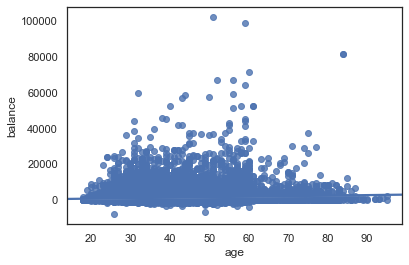

In [28]:
ax = sns.regplot(x="age", y="balance", data=datascorr)

In [48]:
X = datascorr.drop(['age'],axis=1)
y = datascorr.age

In [49]:
import statsmodels.api as sm  
mod1 = sm.OLS(y, X).fit()  
mod1.summary()  

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                    age   R-squared (uncentered):                   0.915
Model:                            OLS   Adj. R-squared (uncentered):              0.915
Method:                 Least Squares   F-statistic:                          2.427e+04
Date:                Wed, 18 Dec 2019   Prob (F-statistic):                        0.00
Time:                        17:27:20   Log-Likelihood:                     -1.7777e+05
No. Observations:               45211   AIC:                                  3.556e+05
Df Residuals:                   45191   BIC:                                  3.558e+05
Df Model:                          20                                                  
Covariance Type:            nonrobust                                                  
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
balance                 0.0005   1.93e-05     23.777      0.000       0.000       0.000
default_yes             1.1242      0.438      2.567      0.010       0.266       1.983
y_yes                   2.9333      0.184     15.981      0.000       2.574       3.293
loan                    2.2432      0.094     23.936      0.000       2.059       2.427
education_secondary    13.4183      0.154     87.144      0.000      13.116      13.720
education_tertiary     10.9982      0.210     52.257      0.000      10.586      11.411
education_unknown      15.6900      0.320     49.018      0.000      15.063      16.317
job_blue-collar        18.6950      0.185    101.244      0.000      18.333      19.057
job_entrepreneur       18.4847      0.356     51.990      0.000      17.788      19.182
job_housemaid          28.0306      0.371     75.597      0.000      27.304      28.757
job_management         17.7998      0.225     78.951      0.000      17.358      18.242
job_retired            40.6806      0.289    140.744      0.000      40.114      41.247
job_self-employed      17.3015      0.348     49.656      0.000      16.619      17.984
job_services           14.8467      0.238     62.454      0.000      14.381      15.313
job_student             6.3855      0.440     14.510      0.000       5.523       7.248
job_technician         15.5808      0.202     77.022      0.000      15.184      15.977
job_unemployed         19.5747      0.366     53.413      0.000      18.856      20.293
job_unknown            24.1758      0.751     32.182      0.000      22.703      25.648
marital_married        12.9346      0.162     79.937      0.000      12.617      13.252
marital_single          5.0209      0.184     27.244      0.000       4.660       5.382
==============================================================================
Omnibus:                     1997.895   Durbin-Watson:                   1.882
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2272.454
Skew:                           0.546   Prob(JB):                         0.00
Kurtosis:                       3.110   Cond. No.                     4.39e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.39e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Linear regresion 
For predict the age and balance 

In [50]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.model_selection import train_test_split
import sklearn.linear_model as lm

from sklearn.pipeline import make_pipeline

In [51]:
datascorr = datascorr.apply(pd.to_numeric)

datascorr = datascorr.astype(int)


In [52]:
#np.corrcoef(y_pred,target_test)
#
#for k in range(1,8):
#    poly_model = make_pipeline (StandardScaler(), PolynomialFeatures(k), LinearRegression())
#    model = poly_model.fit(data_test, target_test)#

#    print(k, poly_model.score(data_test, target_test))

In [53]:
import statsmodels.api as sm  
mod1 = sm.OLS(y, X).fit()  
mod1.summary() 

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                    age   R-squared (uncentered):                   0.915
Model:                            OLS   Adj. R-squared (uncentered):              0.915
Method:                 Least Squares   F-statistic:                          2.427e+04
Date:                Wed, 18 Dec 2019   Prob (F-statistic):                        0.00
Time:                        17:27:29   Log-Likelihood:                     -1.7777e+05
No. Observations:               45211   AIC:                                  3.556e+05
Df Residuals:                   45191   BIC:                                  3.558e+05
Df Model:                          20                                                  
Covariance Type:            nonrobust                                                  
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
balance                 0.0005   1.93e-05     23.777      0.000       0.000       0.000
default_yes             1.1242      0.438      2.567      0.010       0.266       1.983
y_yes                   2.9333      0.184     15.981      0.000       2.574       3.293
loan                    2.2432      0.094     23.936      0.000       2.059       2.427
education_secondary    13.4183      0.154     87.144      0.000      13.116      13.720
education_tertiary     10.9982      0.210     52.257      0.000      10.586      11.411
education_unknown      15.6900      0.320     49.018      0.000      15.063      16.317
job_blue-collar        18.6950      0.185    101.244      0.000      18.333      19.057
job_entrepreneur       18.4847      0.356     51.990      0.000      17.788      19.182
job_housemaid          28.0306      0.371     75.597      0.000      27.304      28.757
job_management         17.7998      0.225     78.951      0.000      17.358      18.242
job_retired            40.6806      0.289    140.744      0.000      40.114      41.247
job_self-employed      17.3015      0.348     49.656      0.000      16.619      17.984
job_services           14.8467      0.238     62.454      0.000      14.381      15.313
job_student             6.3855      0.440     14.510      0.000       5.523       7.248
job_technician         15.5808      0.202     77.022      0.000      15.184      15.977
job_unemployed         19.5747      0.366     53.413      0.000      18.856      20.293
job_unknown            24.1758      0.751     32.182      0.000      22.703      25.648
marital_married        12.9346      0.162     79.937      0.000      12.617      13.252
marital_single          5.0209      0.184     27.244      0.000       4.660       5.382
==============================================================================
Omnibus:                     1997.895   Durbin-Watson:                   1.882
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2272.454
Skew:                           0.546   Prob(JB):                         0.00
Kurtosis:                       3.110   Cond. No.                     4.39e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.39e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [54]:
# store the feature matrix (X) and response vector (y) 
X = datascorr.drop(['age'],axis=1)
y = datascorr.age

# splitting X and y into training and testing sets 
from sklearn.model_selection import train_test_split 
X_train_lrr, X_test_lrr, y_train_lrr, y_test_lrr = train_test_split(X, y, test_size=0.4, random_state=1) 

# training the model on training set 

import sklearn.linear_model as lm
#from sklearn import LinearRegression
x = lm.LinearRegression()
x.fit(X_train_lrr, y_train_lrr) 

# making predictions on the testing set 
y_pred_lrr = x.predict(X_test_lrr) 
y_pred_lrr



#print(x.coef_)
print(x.score(X_train_lrr, y_train_lrr))


0.40691874485134


In [55]:
#visualizacion

#plt.scatter(X_test_lrr, y_test_lrr)
#plt.plot(X_train_lrr, y_pred_lrr, color='red', linewidth=3)
#plt.title('Regresión Lineal Simple')
#plt.xlabel('Número de habitaciones')
#plt.ylabel('Valor medio')
#plt.show()


In [32]:
#from sklearn.metrics import mean_squared_error
# The coefficients
#print('Coefficients: \n', x.coef_)
# The mean squared error
#mean_squared_error(y_test_lrr, y_pred)
#mean_squared_error(y_test_lrr, y_pred)
# The coefficient of determination: 1 is perfect prediction
#print('Coefficient of determination: %.2f' r2_score(y_test_lrr,y_pred_lrr))



## SVR

In [39]:
# store the feature matrix (X) and response vector (y) 
X = datascorr.drop(['balance'],axis=1)
y = datascorr.balance

# splitting X and y into training and testing sets 
from sklearn.model_selection import train_test_split 
X_train_svr, X_test_svr, y_train_svr, y_test_svr = train_test_split(X, y, test_size=0.4, random_state=1) 

# training the model on training set 
from sklearn.svm import SVR
svr = SVR(kernel='linear', C=1, gamma=0.1, epsilon=.1)  #kernel='rbf'   C=100
svr.fit(X_train_svr, y_train_svr) 

# making predictions on the testing set 
y_pred_svr = svr.predict(X_test_svr) 

# comparing actual response values (y_test) with predicted response values (y_pred) 
#from sklearn import metrics 
#print("LinearRegression model accuracy(in %):", metrics.accuracy_score(y_test_svr, y_pred_svr)*100)

y_pred_svr
#print(x.coef_)
print(svr.score(X_train_svr, y_train_svr))

-0.0636713948196832


In [131]:

#from sklearn.linear_model import regresion_lineal
#r2 = regresion_lineal.score(x.reshape(-1,1), y)

Accuracy score is only for classification problems. For regression problems you can use: R2 Score, MSE (Mean Squared Error), RMSE (Root Mean Squared Error).

In [171]:
import statsmodels.api as sm  
mod1 = sm.OLS(y, X).fit()  
#mod1.summary()  

In [137]:
#import statsmodels.formula.api as smf  
#mod2 = smf.ols('y ~ x1', data=datascorr).fit() 

## Polinimial regresion

#### Let's try predict the balance

In [29]:
# store the feature matrix (X) and response vector (y) 
Xx = datascorr.drop(['balance'],axis=1)
yy = datascorr.balance


# splitting X and y into training and testing sets 
import sklearn.linear_model as lm

from sklearn.model_selection import train_test_split 
X_train_pp, X_test_pp, y_train_pp, y_test_pp = train_test_split(Xx, yy, test_size=0.4, random_state=1) 

# training the model on training set 
from sklearn import preprocessing
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
poli_reg =PolynomialFeatures(degree = 2)

# Transform feautures with bigger degree
X_train_pp=poli_reg.fit_transform(X_train_pp)
X_test_pp=poli_reg.fit_transform(X_test_pp)

pr=lm.LinearRegression()


pr.fit(X_train_pp, y_train_pp) 

# making predictions on the testing set 
y_pred_pp = pr.predict(X_test_pp) 
y_pred_pp
# comparing actual response values (y_test) with predicted response values (y_pred) 
#from sklearn import metrics 
#print("Polinomial model accuracy(in %):", metrics.accuracy_score(y_test_p, y_pred_p)*100)
print(pr.score(X_train_pp, y_train_pp))

0.04225670347270183


#### And here the age:

In [30]:
# store the feature matrix (X) and response vector (y) 
X = datascorr.drop(['age'],axis=1)
y = datascorr.age

# splitting X and y into training and testing sets 
import sklearn.linear_model as lm

from sklearn.model_selection import train_test_split 
X_train_pp, X_test_pp, y_train_pp, y_test_pp = train_test_split(X, y, test_size=0.4, random_state=1) 

# training the model on training set 
from sklearn import preprocessing
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
poli_reg =PolynomialFeatures(degree = 2)#2

# Transform feautures with bigger degree
X_train_pp=poli_reg.fit_transform(X_train_pp)
X_test_pp=poli_reg.fit_transform(X_test_pp)

pr=lm.LinearRegression()


pr.fit(X_train_pp, y_train_pp) 

# making predictions on the testing set 
y_pred_pp = pr.predict(X_test_pp) 
y_pred_pp
# comparing actual response values (y_test) with predicted response values (y_pred) 
#from sklearn import metrics 
#print("Polinomial model accuracy(in %):", metrics.accuracy_score(y_test_p, y_pred_p)*100)
print(pr.score(X_train_pp, y_train_pp))

0.42742171911232174


In [40]:
#mse =mean_squared_error(y, y_pred_pp)
#print("Mean Squared Error:",mse)
#import sklearn.metrics as metrics

#print(metrics.r2_score(y_train_pp, y_pred_pp))
#rmse = math.sqrt(mse)
#print("Root Mean Squared Error:", rmse)

## Bosques Aleatorios Regresión

In [46]:
#Seleccionamos solamente la columna 6 del dataset
X_bar = datascorr.drop(['balance'],axis=1)
#Defino los datos correspondientes a las etiquetas
y_bar = datascorr.balance
#Graficamos los datos correspondientes
#plt.scatter(X_bar, y_bar)
#plt.show()
########## IMPLEMENTACIÓN DE BOSQUES ALEATORIOS REGRESIÓN ##########
from sklearn.model_selection import train_test_split
#Separo los datos de "train" en entrenamiento y prueba para probar los algoritmos
X_train, X_test, y_train, y_test = train_test_split(X_bar, y_bar, test_size=0.2)
from sklearn.ensemble import RandomForestRegressor
#Defino el algoritmo a utilizar
bar = RandomForestRegressor(n_estimators = 300, max_depth = 8)
#Entreno el modelo
bar.fit(X_train, y_train)
#Realizo una predicción
Y_pred = bar.predict(X_test)
#Graficamos los datos de prueba junto con la predicción
#X_grid = np.arange(min(X_test), max(X_test), 0.1)
#X_grid = X_grid.reshape((len(X_grid), 1))
#plt.scatter(X_test, y_test)
#plt.plot(X_grid, bar.predict(X_grid), color='red', linewidth=3)
#plt.show()
#
print('DATOS DEL MODELO BOSQUES ALEATORIOS REGRESION')
print()
print('Precisión del modelo:')
print(bar.score(X_train, y_train))

DATOS DEL MODELO BOSQUES ALEATORIOS REGRESION

Precisión del modelo:
0.12291009218297057


# INFO DATABASE 2:

### Data inputs
1.age (numeric)

2.job : type of job (categorical: “admin”, “blue-collar”, “entrepreneur”, “housemaid”, “management”, “retired”, “self-employed”, “services”, “student”, “technician”, “unemployed”, “unknown”)

3.marital : marital status (categorical: “divorced”, “married”, “single”, “unknown”)

4.education (categorical: “basic.4y”, “basic.6y”, “basic.9y”, “high.school”, “illiterate”, “professional.course”, “university.degree”, “unknown”)

5.default: has credit in default? (categorical: “no”, “yes”, “unknown”)

6.housing: has housing loan? (categorical: “no”, “yes”, “unknown”)

7.loan: has personal loan? (categorical: “no”, “yes”, “unknown”)

8.contact: contact communication type (categorical: “cellular”, “telephone”)

9.month: last contact month of year (categorical: “jan”, “feb”, “mar”, …, “nov”, “dec”)

10.day_of_week: last contact day of the week (categorical: “mon”, “tue”, “wed”, “thu”, “fri”)

11.duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y=’no’). The duration is not known before a call is performed, also, after the end of the call, y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model

12.campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)

13.pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)

14.previous: number of contacts performed before this campaign and for this client (numeric)

15.poutcome: outcome of the previous marketing campaign (categorical: “failure”, “nonexistent”, “success”)

16.emp.var.rate: employment variation rate — (numeric)

17.cons.price.idx: consumer price index — (numeric)

18.cons.conf.idx: consumer confidence index — (numeric)

19.euribor3m: euribor 3 month rate — (numeric)

20.nr.employed: number of employees — (numeric)

### Target Variable
y — has the client subscribed a term deposit? (binary: “1”, means “Yes”, “0” means “No”)

In [90]:
data2=data_add_full

In [91]:
data2.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

In [92]:
def explore_data(df):
    # this function applies many exploratory techniques to a given a overview of the dataframe
    display("Head",
            df.head()
            .style
            .background_gradient(cmap='Blues')
           )
    display("Data Types",
            df.dtypes
            .to_frame()
           )
    display("Data Types Count",
            df.dtypes
            .to_frame()[0]
            .value_counts()
            .to_frame()
           )
    display("Nan Values per Column",
            df.isna()
            .sum()
            .to_frame()
            .sort_values(by=[0], ascending=False)
           )
    display("Descriptive Statistics",
            df.describe()
           )
    display("Correlation Matrix",
            df.corr()
            .style.background_gradient(cmap='coolwarm')
            .set_precision(2)
           )
    
#explore_data(data2)

In [93]:
#df['y'] = df['y'].map({'no':0, 'yes':1}) # binary encoding of class label
from sklearn.preprocessing import LabelEncoder

lb_make = LabelEncoder()
data2['y']=lb_make.fit_transform(data2["y"])
data2['job']=lb_make.fit_transform(data2["job"])
data2['marital']=lb_make.fit_transform(data2["marital"])
data2['education']=lb_make.fit_transform(data2["education"])
data2['default']=lb_make.fit_transform(data2["default"])
data2['housing']=lb_make.fit_transform(data2["housing"])
data2['loan']=lb_make.fit_transform(data2["loan"])
data2['contact']=lb_make.fit_transform(data2["contact"])
data2['month']=lb_make.fit_transform(data2["month"])
data2['day_of_week']=lb_make.fit_transform(data2["day_of_week"])
data2['poutcome']=lb_make.fit_transform(data2["poutcome"])


In [94]:
round(data.pivot_table(index='education', columns='job',aggfunc={'balance': np.mean}),0)

balance                                                        \
job        admin. blue-collar entrepreneur housemaid management retired   
education                                                                 
primary     930.0      1086.0       1679.0    1128.0     1672.0  1880.0   
secondary  1116.0      1064.0       1071.0    1444.0     1327.0  2061.0   
tertiary   1218.0      1549.0       1832.0    1830.0     1834.0  2161.0   
unknown    1601.0      1041.0       1554.0    2939.0     1635.0  1503.0   

                                                                        
job       self-employed services student technician unemployed unknown  
education                                                               
primary          1331.0    967.0  1244.0     1487.0     1588.0  1750.0  
secondary        1287.0    958.0  1260.0     1125.0     1433.0  1250.0  
tertiary         1951.0   1211.0  1645.0     1511.0     1687.0  2359.0  
unknown          1569.0   1683.0  1475.0     1758.0     1522.0  1893.0

In [95]:
bank.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


In [96]:
#data2.info()

data2.corr().style.background_gradient(cmap='Greys').set_precision(5)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
age,1,0.0012496,-0.38975,-0.11789,0.16497,-0.0016033,-0.0073682,0.0070209,-0.024877,-0.017572,-0.00086571,0.0045936,-0.034369,0.024365,0.01975,-0.00037069,0.00085671,0.12937,0.010767,-0.017725,0.030399
job,0.0012496,1,0.027897,0.13412,-0.028277,0.0069621,-0.010209,-0.025132,-0.033213,-0.00084419,-0.0064896,-0.0069233,-0.028468,0.020965,0.011504,-0.0082711,-0.016017,0.05276,-0.0078802,-0.019574,0.025122
marital,-0.38975,0.027897,1,0.10922,-0.07945,0.010467,0.0057882,-0.054501,-0.0076286,0.0022018,0.01029,-0.0072405,-0.037942,0.038689,0.0019121,-0.08421,-0.057477,-0.033783,-0.091939,-0.086199,0.046203
education,-0.11789,0.13412,0.10922,1,-0.18686,0.016825,0.0063837,-0.10573,-0.082684,-0.017986,-0.015102,0.00037063,-0.046626,0.038831,0.017009,-0.043778,-0.081607,0.078799,-0.03638,-0.041492,0.057799
default,0.16497,-0.028277,-0.07945,-0.18686,1,-0.015815,-0.0037821,0.13524,-0.01583,-0.0087009,-0.011794,0.032825,0.080062,-0.10242,0.023417,0.20326,0.16807,0.026522,0.19534,0.18985,-0.099352
housing,-0.0016033,0.0069621,0.010467,0.016825,-0.015815,1,0.044296,-0.082186,-0.018141,0.0033389,-0.0076583,-0.01101,-0.010551,0.021314,-0.011783,-0.060196,-0.080504,-0.033845,-0.059277,-0.045862,0.011552
loan,-0.0073682,-0.010209,0.0057882,0.0063837,-0.0037821,0.044296,1,-0.0085563,-0.0057052,-0.0093442,-0.0009163,0.0051655,0.00034503,-0.0013274,-0.001511,0.0018495,-0.0024299,-0.012025,0.00012547,0.0039032,-0.0049086
contact,0.0070209,-0.025132,-0.054501,-0.10573,0.13524,-0.082186,-0.0085563,1,0.27656,-0.0095755,-0.026657,0.077368,0.11797,-0.21285,0.11874,0.39358,0.59147,0.25161,0.39977,0.26916,-0.14477
month,-0.024877,-0.033213,-0.0076286,-0.082684,-0.01583,-0.018141,-0.0057052,0.27656,1,0.027677,0.00369,-0.062059,-0.047891,0.10316,-0.065012,-0.17878,-0.0042395,0.0096517,-0.11726,-0.22142,-0.0060648
day_of_week,-0.017572,-0.00084419,0.0022018,-0.017986,-0.0087009,0.0033389,-0.0093442,-0.0095755,0.027677,1,0.02195,-0.038288,-0.0095306,-0.0041023,0.018732,0.033245,0.0056435,0.041465,0.039043,0.02838,0.015967


## Visualizing the Data

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a2c07c748>,
      dtype=object)

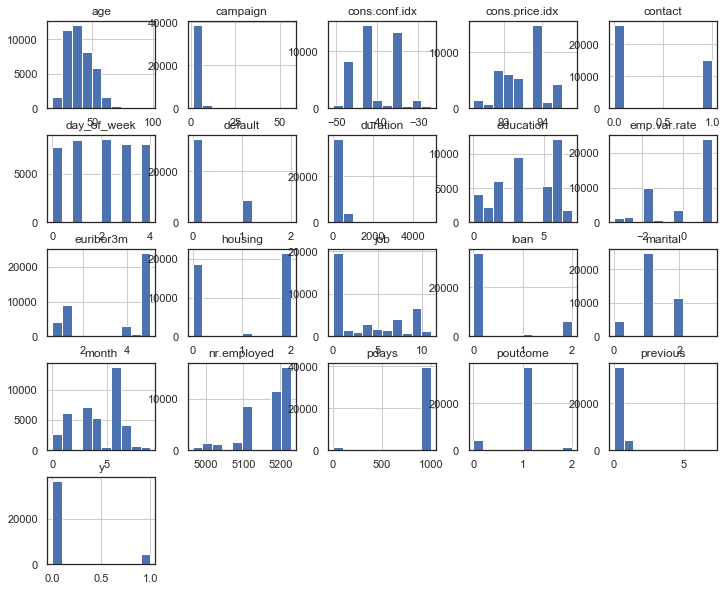

In [97]:
data2.hist(figsize=(12,10))


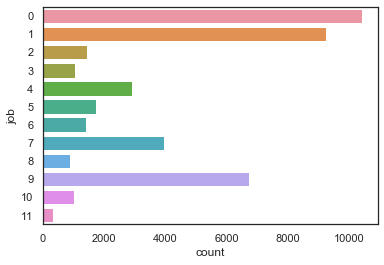

In [98]:
sns.countplot(y='job', data=data2)

In [99]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
age               41188 non-null int64
job               41188 non-null int64
marital           41188 non-null int64
education         41188 non-null int64
default           41188 non-null int64
housing           41188 non-null int64
loan              41188 non-null int64
contact           41188 non-null int64
month             41188 non-null int64
day_of_week       41188 non-null int64
duration          41188 non-null int64
campaign          41188 non-null int64
pdays             41188 non-null int64
previous          41188 non-null int64
poutcome          41188 non-null int64
emp.var.rate      41188 non-null float64
cons.price.idx    41188 non-null float64
cons.conf.idx     41188 non-null float64
euribor3m         41188 non-null float64
nr.employed       41188 non-null float64
y                 41188 non-null int64
dtypes: float64(5), int64(16)
memory usage: 6.6 MB


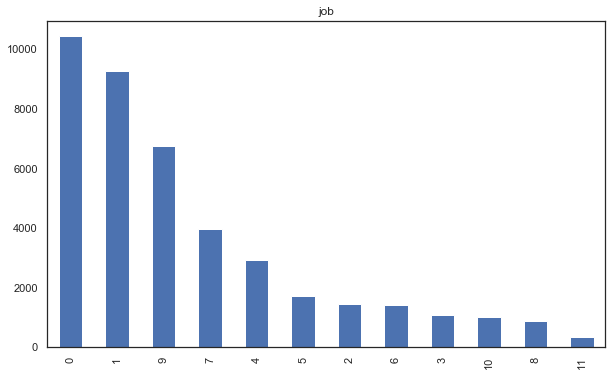

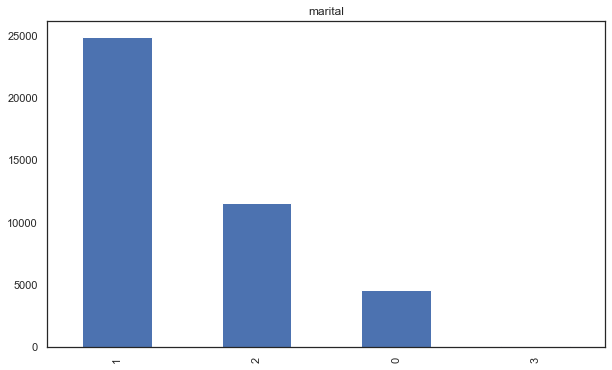

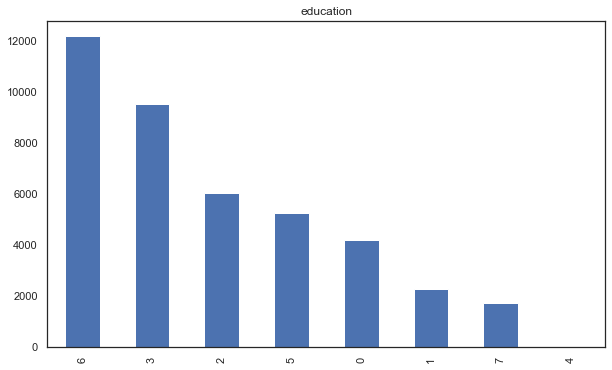

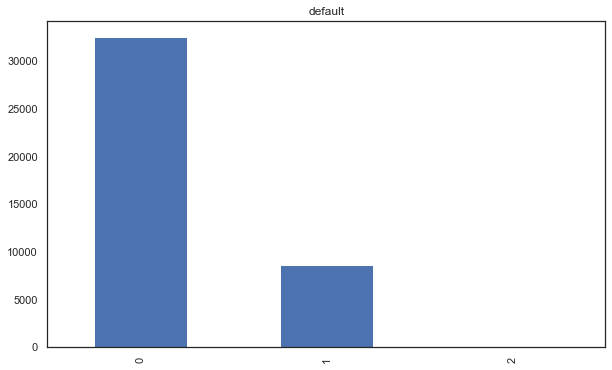

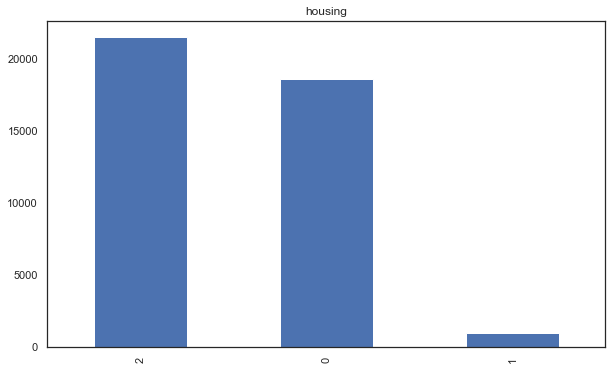

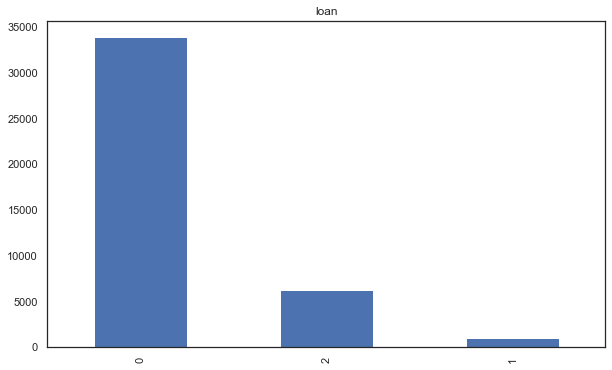

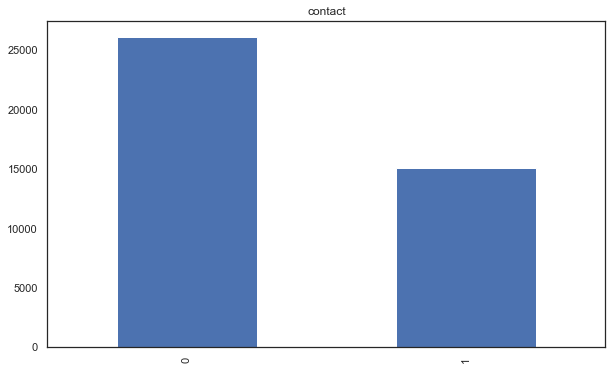

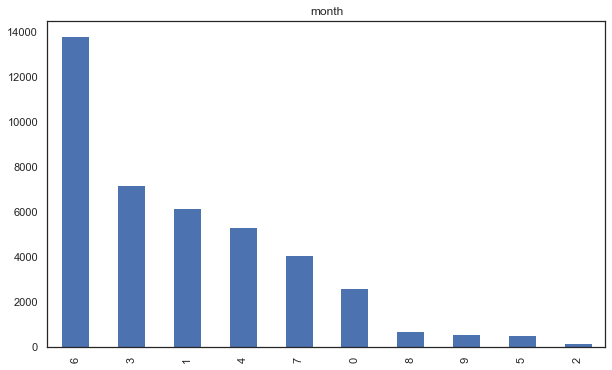

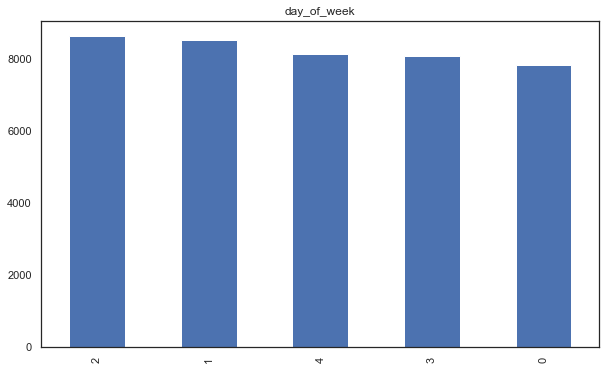

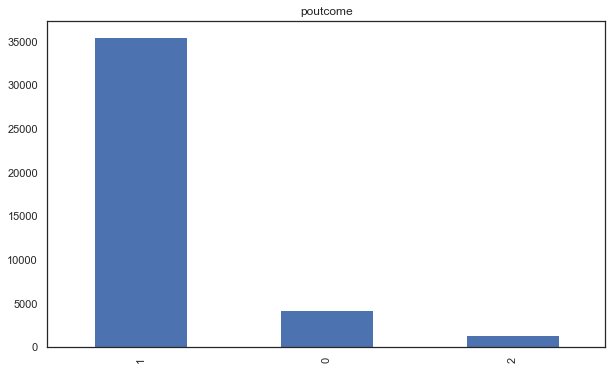

In [100]:
# visualize categorical features
categorical = ['job','marital','education','default','housing','loan','contact','month','day_of_week','poutcome']
for i in categorical:
    data2[i].value_counts().plot(kind='bar',figsize = (10, 6),title=i)
    plt.show()

In [101]:
data2['y'].value_counts() # dataset is imbalanced with majority of class label as "no".

0    36548
1     4640
Name: y, dtype: int64

# Machine learning database 2 


How y is for a clasification variable, I want to analise the a classification data using next models:
    
    - LogisticRegression
    - GaussianNB
    - Kneighboors Clasifier
    - SVC
    - Decision tree 
    - Randomforest

We select the colummn where is asked "has the client subscribed a term deposit?"

In [102]:
y =data2.y
X=data2.drop(['y'],axis=1)
X.shape ,y.shape

((41188, 20), (41188,))

In [103]:
#So imabalanced data

count = data2.groupby('y').size()
percent = count/len(data2)*100
print(percent)

y
0    88.734583
1    11.265417
dtype: float64


In [104]:
balancedata=data2.sort_values(by=['y'], ascending=False).head(10000)


In [105]:
count = balancedata.groupby('y').size()
percent = count/len(balancedata)*100
print(percent)

y
0    53.6
1    46.4
dtype: float64


## LogisticRegression

In [107]:
# store the feature matrix (X) and response vector (y) 
#X = data2.drop(['y'],axis=1)
#y = data2.y 

# splitting X and y into training and testing sets 
from sklearn.model_selection import train_test_split 
X_train_lr, X_test_lr, y_train_lr, y_test_lr = train_test_split(X, y, test_size=0.4, random_state=1) 

# training the model on training set 
from sklearn.linear_model import LogisticRegression
x = LogisticRegression()#C=7,penalty='l2', verbose=5,solver="lbfgs",max_iter=150)
x.fit(X_train_lr, y_train_lr) 

# making predictions on the testing set 
y_pred_lr = x.predict(X_test_lr) 

# comparing actual response values (y_test) with predicted response values (y_pred) 
from sklearn import metrics 
print("LogisticRegression model accuracy(in %):", metrics.accuracy_score(y_test_lr, y_pred_lr)*100)

/Users/Estelle/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression model accuracy(in %): 91.01723719349356


In [108]:
print(classification_report(y_test_lr,y_pred_lr))

              precision    recall  f1-score   support

           0       0.93      0.97      0.95     14601
           1       0.67      0.42      0.51      1875

    accuracy                           0.91     16476
   macro avg       0.80      0.70      0.73     16476
weighted avg       0.90      0.91      0.90     16476



## GaussianNB

In [112]:
# splitting X and y into training and testing sets 
from sklearn.model_selection import train_test_split 
X_train_nb, X_test_nb, y_train_nb, y_test_nb = train_test_split(X, y, test_size=0.4, random_state=1) 

# training the model on training set

from sklearn.naive_bayes import GaussianNB 
gnb = GaussianNB() 
gnb.fit(X_train_nb, y_train_nb) 

# making predictions on the testing set 
y_pred_nb = gnb.predict(X_test_nb) 

# comparing actual response values (y_test) with predicted response values (y_pred) 
from sklearn import metrics 
print("Gaussian Naive Bayes model accuracy(in %):", metrics.accuracy_score(y_test_nb, y_pred_nb)*100)


Gaussian Naive Bayes model accuracy(in %): 84.86890021849963


In [113]:
print(classification_report(y_test_nb,y_pred_nb))

              precision    recall  f1-score   support

           0       0.95      0.88      0.91     14601
           1       0.39      0.60      0.48      1875

    accuracy                           0.85     16476
   macro avg       0.67      0.74      0.69     16476
weighted avg       0.88      0.85      0.86     16476



In [114]:
#confusion_matrix(y_test_nb, y_pred_nb)


## Kneighboors Clasifier






In [115]:
# splitting X and y into training and testing sets 
from sklearn.model_selection import train_test_split 
X_train_kc, X_test_kc, y_train_kc, y_test_kc = train_test_split(X, y, test_size=0.4, random_state=1) 

# training the model on training set 
from sklearn.neighbors import KNeighborsClassifier
x = KNeighborsClassifier() 
x.fit(X_train_kc, y_train_kc) 

# making predictions on the testing set 
y_pred_kc = x.predict(X_test_kc) 

# comparing actual response values (y_test) with predicted response values (y_pred) 
from sklearn import metrics 
print("KNeighborsClassifier model accuracy(in %):", metrics.accuracy_score(y_test_kc, y_pred_kc)*100)

KNeighborsClassifier model accuracy(in %): 90.41636319495024


In [116]:
print(classification_report(y_test_kc,y_pred_kc))


              precision    recall  f1-score   support

           0       0.94      0.96      0.95     14601
           1       0.60      0.49      0.54      1875

    accuracy                           0.90     16476
   macro avg       0.77      0.72      0.74     16476
weighted avg       0.90      0.90      0.90     16476



## SVC

In [117]:
# splitting X and y into training and testing sets 
from sklearn.model_selection import train_test_split 
X_train_svc, X_test_svc, y_train_svc, y_test_svc = train_test_split(X, y, test_size=0.4, random_state=1) 

# training the model on training set 
from sklearn.svm import SVC
x = SVC(kernel = 'linear') 
x.fit(X_train_svc, y_train_svc) 

# making predictions on the testing set 
y_pred_svc = x.predict(X_test_svc) 

# comparing actual response values (y_test) with predicted response values (y_pred) 
from sklearn import metrics 
print("SVC model accuracy(in %):", metrics.accuracy_score(y_test_svc, y_pred_svc)*100)

SVC model accuracy(in %): 89.8458363680505


In [118]:
print(classification_report(y_test_svc,y_pred_svc))

              precision    recall  f1-score   support

           0       0.94      0.95      0.94     14601
           1       0.56      0.49      0.52      1875

    accuracy                           0.90     16476
   macro avg       0.75      0.72      0.73     16476
weighted avg       0.89      0.90      0.90     16476



## DecisionTreeClassifier

In [ ]:
# splitting X and y into training and testing sets 
from sklearn.model_selection import train_test_split 
X_train_dtc, X_test_dtc, y_train_dtc, y_test_dtc = train_test_split(X, y, test_size=0.4, random_state=1) 

# training the model on training set 
from sklearn.tree import DecisionTreeClassifier
x = DecisionTreeClassifier(criterion = 'gini') 
x.fit(X_train_dtc, y_train_dtc) 

# making predictions on the testing set 
y_pred_dtc = x.predict(X_test_dtc) 

# comparing actual response values (y_test) with predicted response values (y_pred) 
from sklearn import metrics 
print("DecisionTreeClassifier model accuracy(in %):", metrics.accuracy_score(y_test_dtc, y_pred_dtc)*100)

In [ ]:
print(classification_report(y_test_dtc,y_pred_dtc))

## RandomForestClassifier

How the data is imbamanced this is the best model for this kind of data:

In [ ]:
# splitting X and y into training and testing sets 
from sklearn.model_selection import train_test_split 
X_train_rfc, X_test_rfc, y_train_rfc, y_test_rfc = train_test_split(X, y, test_size=0.4, random_state=1) 

# training the model on training set 
from sklearn.ensemble import RandomForestClassifier
x = RandomForestClassifier(n_estimators=100, criterion = 'gini') # gini is better
x.fit(X_train_rfc, y_train_rfc) 

# making predictions on the testing set 
y_pred_rfc = x.predict(X_test_rfc) 

# comparing actual response values (y_test) with predicted response values (y_pred) 
from sklearn import metrics 
print("RandomForestClassifier model accuracy(in %):", metrics.accuracy_score(y_test_rfc, y_pred_rfc)*100)

In [ ]:
print(classification_report(y_test_rfc,y_pred_rfc))

## BALANCE DATA

In [ ]:
balancedata=data2.sort_values(by=['y'], ascending=False).head(10000)

In [ ]:
count = balancedata.groupby('y').size()
percent = count/len(balancedata)*100
print(percent)

In [ ]:
from sklearn.metrics import confusion_matrix, precision_recall_curve, auc, roc_auc_score, roc_curve, recall_score, classification_report

In [ ]:
y =balancedata.y
X=balancedata.drop(['y'],axis=1)
X.shape ,y.shape


# splitting X and y into training and testing sets 
from sklearn.model_selection import train_test_split 
X_train_rfc, X_test_rfc, y_train_rfc, y_test_rfc = train_test_split(X, y, test_size=0.4, random_state=1) 

# training the model on training set 
from sklearn.ensemble import RandomForestClassifier
x = RandomForestClassifier(n_estimators=100, criterion = 'gini') # gini is better
x.fit(X_train_rfc, y_train_rfc) 

# making predictions on the testing set 
y_pred_rfc = x.predict(X_test_rfc) 

# comparing actual response values (y_test) with predicted response values (y_pred) 
from sklearn import metrics 
print("RandomForestClassifier model accuracy(in %):", metrics.accuracy_score(y_test_rfc, y_pred_rfc)*100)

In [118]:
print(classification_report(y_test_rfc,y_pred_rfc))

              precision    recall  f1-score   support

           0       0.93      0.97      0.95      2128
           1       0.97      0.91      0.94      1872

    accuracy                           0.94      4000
   macro avg       0.95      0.94      0.94      4000
weighted avg       0.95      0.94      0.94      4000



In [57]:
IDEAS:  
    
    predict if will be a top 20% client in balance having the rest of the data
    
    
  linearSVC puede ser un modelo interesante  
    
    subgroup: 
        
        ver default => deuda no pagada:  con balance, estudios, profesion y edad, calcular el dinero de un una persona
        ver balance => negativo: con studios, profesion y edad
        has personal loan or house => LOANS=== sma de los dos creditos
        grafic: educatio, job, singles VS married
    
    corr: 
        
        14 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric, -1 means client was not previously contacted)

        15 - previous: number of contacts performed before this campaign and for this client (numeric)
   
  predecir:
        
        edad / profesion / educacion en funcion de balance
        
        cuando no va a default en funcion de balance?
        
        hacer reshape con el 10%  para ver si va a pagar el credit
        relacion entre eucacion y trabajo

In [ ]:
DUDAS:
linspace??? LASSO??satandarizar??parameter??

hyper

ERRORES?? 

BIAS
Variance
Noise

sub-overfitting???

RMSE, MAR, R2??


sub/o
  Best profesi, mas dinero, estudiantes tienen mas dinero que el sector servicios.
Pre Processing
Sklearn provides a very efficient tool for encoding the levels of a categorical features into numeric values. LabelEncoder encode labels with value between 0 and n_classes-1

In [ ]:
###StandardScaler?? collinear_features???

##I have to balance, outliers, 
#colliner? imbalanced? regresion VS clasification?? clean outliers ??? reshape?? ===> aplicar todo


# Scale the model before splitting it as train & test
#from sklearn.preprocessing import StandardScaler
#scaler = StandardScaler()
#bank_num_scale = scaler.fit_transform(bank_num)


from sklearn.preprocessing import StandardScaler

Solucion de otros proyectos: The customer's account balance has a huge influence on the campaign's outcome. People with account balance above 1490$ are more likely to subscribe for term deposit, so future address those customers.

### Tools that I didn't use:

In [ ]:
########      EXTRA: other visualizations

   #data.plot(figsize=(12,6))
   #plt.style.use('classic')

   #sns.jointplot(x=data['age'], y=data['balance'], kind='kde', color='blue')
   
   #fig = plt.figure()
   #fig.suptitle('Algorithm Comparison')
   #ax = fig.add_subplot(111)
   #plt.boxplot(balance_loan.T)
   #ax.set_xticklabels(names)

#########       Resample para balancear

# perform upsampling to address sample imbalance
from sklearn.utils import resample
# Separate majority and minority classes
train_negative = train_set[train_set['y']==0]
train_positive = train_set[train_set['y']==1]
 
# Upsample minority class
train_positive_upsample = resample(train_positive, 
                                 replace=True,     # sample with replacement
                                 n_samples=29238,    # to match majority class
                                 random_state=18) # reproducible results
 
# Combine majority class with upsampled minority class
train_upsample = pd.concat([train_negative, train_positive_upsample])
 
# Display new class counts
train_upsample['y'].value_counts()


anhadir dueda del proyecto anterior para aima y calcular series y deep learning( tensor flow, azure, profet, keras, )




############           EESTIUDIAEEErrrrr
from learn.pipeline import Pipeline
from sklearn.feature_selection import SelectFromModel
from sklearn.svm import LinearSVC
clf = Pipeline([
  ('feature_selection', SelectFromModel(LinearSVC(penalty="l1"))),
  ('classification', RandomForestRegressor())
])
clf.fit(X, y)





######################                pendeiente por estudiar





# Hyper parameter tuning by using grid search cv
#importing modules
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
#making the instance
model=LogisticRegression()
#Hyper Parameters Set
params = {'C': [1,2,3,4,5,6,7], 
          'penalty': ['l1','l2']}
#Making models with hyper parameters sets
model1 = GridSearchCV(model, param_grid=params, n_jobs=-1)
#Learning
model1.fit(x_train,y_train)
#The best hyper parameters set
print("Best Hyper Parameters:\n",model1.best_params_)
#Prediction
pred=model1.predict(x_test)
#importing the metrics module
from sklearn import metrics
#evaluation(Accuracy)
print("Accuracy:",metrics.accuracy_score(pred,y_test))
#evaluation(Confusion Metrix)
print("Confusion Metrix:\n",metrics.confusion_matrix(pred,y_test))





###########################





import feature_selector

from feature_selector import FeatureSelector
# Features are in train and labels are in train_labels
fs = FeatureSelector(data = train, labels = train_labels)






########################


# visualize the feature importance of final model

# create series of feature importance of final model
series_feature = pd.Series(index=X_train_rfc.columns, data=model_DT_impv.feature_importances_.reshape(62,))

# combine the feature importance value of onehotencoded categorical features back to original feature list

feature_dict={} # create empty dictionary with keys defined
for i in df.columns[:-1]:
    feature_dict[i]=0

# combine feature importance
for i in series_feature.index:
    for j in feature_dict.keys():
        if j in i:
            feature_dict[j]+=series_feature[i]
        else:
            continue

series_feature = pd.Series(feature_dict) # convert dictionary to Series
feature_sort = series_feature.sort_values(ascending=False) # Descending sort of feature importance
# calculate gross contribution
print('Top 10 features contribute to %.1f%% of the final mode.' % sum(feature_sort[0:10]*100))
feature_sort[0:10].plot.bar(figsize = (10, 6))
plt.title('Feature Importance of Top 10 Features')
plt.xlabel('Top 10 Features')
plt.ylabel('Importance Contribution %')



#################################




# create function to fit classifier using GridsearchCV and report metrics score on train dataset
def fit_classifier(model, X, y, parameters=None, scorer_metrics=None):

    # Perform grid search on the classifier using scorer_metrics as the scoring method
    grid_obj = GridSearchCV(estimator = model, param_grid = parameters, scoring=make_scorer(scorer_metrics), cv=10)

    # Fit the grid search object to the training data and find the optimal parameters using fit()
    grid_fit = grid_obj.fit(X, y)

    # Get the estimator
    model_estimator = grid_fit.best_estimator_

    # Report the metrics scores on train data
    model_estimator.fit(X, y)
    y_pred = model_estimator.predict(X)

    print("\n")
    print("\nModel performance on training set\n------------------------")
    print("Final accuracy score on the training data: {:.4f}".format(accuracy_score(y, y_pred)))
    print("Final precision score on training data: {:.4f}".format(precision_score(y, y_pred)))
    print("Final Recall score on training data: {:.4f}".format(recall_score(y, y_pred)))
    print("Final ROC AUC score on training data: {:.4f}".format(roc_auc_score(y, y_pred)))
    print("\n")
    print("The best parameters are: {}".format(model_estimator))

    return model_estimator

#################################

###    ROC

y_pred_sample_score = lr1.decision_function(X_test)


fpr, tpr, thresholds = roc_curve(y_test, y_pred_sample_score)

roc_auc = auc(fpr,tpr)

# Plot ROC
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b',label='AUC = %0.3f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.0])
plt.ylim([-0.1,1.01])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()


roc_auc


print(classification_report(y_test,y_pre))

cnf_matrix




#######################################


### Hyperparameter Search

from sklearn.model_selection import GridSearchCV

from sklearn.metrics import confusion_matrix, precision_recall_curve, auc, roc_auc_score, roc_curve, recall_score, classification_report

parameters = {'C': np.linspace(1,0,2)}
lr = LogisticRegression()
clf = GridSearchCV(lr, parameters, cv=5)#, verbose=5, n_jobs=3)
clf.fit(X_train, y_train.ravel())


clf.best_params_